# Event Studies

In [1]:
pip install eikon

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install eventstudy

Note: you may need to restart the kernel to use updated packages.


# Packages Imports

In [4]:
import eikon as ek
ek.set_app_key("51e03f06c71e4e65b1da001b08796d3dc7731b6c")

In [5]:
import numpy as np
import pandas as pd
import cufflinks as cf
import matplotlib as plt
import math
import matplotlib.pyplot as plt
import scipy as sp
from statsmodels import regression
import statsmodels.api as sm
import xlsxwriter

In [6]:
import eventstudy as es
print(es.__version__)
from eventstudy import excelExporter

0.1a12


# 1. Download Data via Refinitiv API

In [7]:
# Define the list of indices
rics = ['AAPL.O', 'MSFT.O', 'AMZN.O', 'GOOGL.O', 'ADBE.O', 'INTC.O', 'CSCO.O', 'NFLX.O', 'TSLA.O', 'NVDA.O', '.IXIC']

In [8]:
# Define the API parameters
df_test = ek.get_timeseries(rics,
                      start_date="2012-01-01",
                      end_date="2022-12-31",
                      fields="CLOSE",
                      interval="daily"
                      )

In [9]:
df_test.head()

CLOSE,AAPL.O,MSFT.O,AMZN.O,GOOGL.O,ADBE.O,INTC.O,CSCO.O,NFLX.O,TSLA.O,NVDA.O,.IXIC
Date,,,,,,,,,,,
2021-12-02,163.76,329.49,171.868,142.966,671.88,49.5,56.15,616.47,361.532972,321.26,15381.32
2021-12-03,161.84,323.01,169.4895,142.0015,616.53,49.25,56.23,602.13,338.322995,306.93,15085.472
2021-12-06,165.32,326.19,171.3685,143.155,622.04,50.99,56.96,612.69,336.33633,300.37,15225.152
2021-12-07,171.18,334.92,176.1645,147.2695,649.96,52.57,58.08,625.58,350.582983,324.27,15686.916
2021-12-08,175.08,334.97,176.158,148.1865,653.1,51.75,57.02,628.08,356.319644,318.26,15786.988


In [10]:
# The data submitted is incomplete. 
# New Approach: Download the data of the stocks individually and merge them into a single data frame at the end.

In [11]:
# APPLE INC
df1 = ek.get_timeseries("AAPL.O",
                      start_date="2012-01-01",
                      end_date="2022-12-31",
                      fields="Close",
                      interval="daily"
                      )

In [12]:
# MICROSOFT CORP
df2 = ek.get_timeseries("MSFT.O",
                      start_date="2012-01-01",
                      end_date="2022-12-31",
                      fields="Close",
                      interval="daily"
                      )

In [13]:
# AMAZON.COM INC
df3 = ek.get_timeseries("AMZN.O",
                      start_date="2012-01-01",
                      end_date="2022-12-31",
                      fields="Close",
                      interval="daily"
                      )

In [14]:
# ALPHABET INC
df4 = ek.get_timeseries("GOOGL.O",
                      start_date="2012-01-01",
                      end_date="2022-12-31",
                      fields="Close",
                      interval="daily"
                      )

In [15]:
# ADOBE INC
df5 = ek.get_timeseries("ADBE.O",
                      start_date="2012-01-01",
                      end_date="2022-12-31",
                      fields="Close",
                      interval="daily"
                      )

In [16]:
# INTEL CORP
df6 = ek.get_timeseries("INTC.O",
                      start_date="2012-01-01",
                      end_date="2022-12-31",
                      fields="Close",
                      interval="daily"
                      )

In [17]:
# CISCO SYSTEMS INC
df7 = ek.get_timeseries("CSCO.O",
                      start_date="2012-01-01",
                      end_date="2022-12-31",
                      fields="Close",
                      interval="daily"
                      )

In [18]:
# NETFLIX INC
df8 = ek.get_timeseries("NFLX.O",
                      start_date="2012-01-01",
                      end_date="2022-12-31",
                      fields="Close",
                      interval="daily"
                      )

In [19]:
# TESLA INC
df9 = ek.get_timeseries("TSLA.O",
                      start_date="2012-01-01",
                      end_date="2022-12-31",
                      fields="Close",
                      interval="daily"
                      )

In [20]:
# NVIDIA CORP
df10 = ek.get_timeseries("NVDA.O",
                      start_date="2012-01-01",
                      end_date="2022-12-31",
                      fields="Close",
                      interval="daily"
                      )

In [21]:
# NASDAQ COMPOSITE INDEX
df11 = ek.get_timeseries(".IXIC",
                      start_date="2012-01-01",
                      end_date="2022-12-31",
                      fields="Close",
                      interval="daily"
                      )

In [22]:
# Merge all indices prices into one dataframe
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11], axis=1).reset_index()
df.head()

,Date,CLOSE,CLOSE,CLOSE,CLOSE,CLOSE,CLOSE,CLOSE,CLOSE,CLOSE,CLOSE,CLOSE
0,2012-01-03,14.686771,26.765,8.9515,16.651386,28.57,24.54,18.63,10.31999,1.871998,3.51,2648.72
1,2012-01-04,14.7657,27.4,8.8755,16.723206,28.28,25.11,18.99,11.492846,1.847331,3.55,2648.36
2,2012-01-05,14.929628,27.68,8.8805,16.491231,28.48,25.4,18.92,11.32856,1.807998,3.6775,2669.86
3,2012-01-06,15.085699,28.105,9.1305,16.266263,28.72,25.25,18.85,12.327131,1.793998,3.635,2674.22
4,2012-01-09,15.061771,27.74,8.928,15.576595,28.53,25.465,18.97,14.0257,1.816665,3.635,2676.56


In [23]:
# Rename columns of merged datafreme
df.columns = ["Date", 'AAPL.O', 'MSFT.O', 'AMZN.O', 'GOOGL.O', 'ADBE.O', 'INTC.O', 'CSCO.O', 'NFLX.O', 'TSLA.O', 'NVDA.O','.IXIC']
df.head(10)

,Date,AAPL.O,MSFT.O,AMZN.O,GOOGL.O,ADBE.O,INTC.O,CSCO.O,NFLX.O,TSLA.O,NVDA.O,.IXIC
0,2012-01-03,14.686771,26.765,8.9515,16.651386,28.57,24.54,18.63,10.31999,1.871998,3.51,2648.72
1,2012-01-04,14.7657,27.4,8.8755,16.723206,28.28,25.11,18.99,11.492846,1.847331,3.55,2648.36
2,2012-01-05,14.929628,27.68,8.8805,16.491231,28.48,25.4,18.92,11.32856,1.807998,3.6775,2669.86
3,2012-01-06,15.085699,28.105,9.1305,16.266263,28.72,25.25,18.85,12.327131,1.793998,3.635,2674.22
4,2012-01-09,15.061771,27.74,8.928,15.576595,28.53,25.465,18.97,14.0257,1.816665,3.635,2676.56
5,2012-01-10,15.115699,27.84,8.967,15.593611,29.2,25.59,18.83,13.689986,1.841331,3.62,2702.5
6,2012-01-11,15.091056,27.72,8.945,15.66418,29.32,25.8,19.07,13.164273,1.881998,3.5475,2710.76
7,2012-01-12,15.049628,28.0,8.7965,15.756269,29.23,25.75,19.15,13.164273,1.883331,3.525,2724.7
8,2012-01-13,14.993199,28.25,8.921,15.639906,28.97,25.14,19.06,13.482844,1.519332,3.4325,2710.67
9,2012-01-17,15.167842,28.255,9.083,15.729743,29.35,25.04,19.305,13.531415,1.773332,3.38,2728.08


In [24]:
# Set Date as Index
df['Date'] = pd.to_datetime(df['Date'])  # Convert "Date" column to datetime
df.set_index('Date', inplace=True)  # Set "Date" as the index
df.head()

,AAPL.O,MSFT.O,AMZN.O,GOOGL.O,ADBE.O,INTC.O,CSCO.O,NFLX.O,TSLA.O,NVDA.O,.IXIC
Date,,,,,,,,,,,
2012-01-03,14.686771,26.765,8.9515,16.651386,28.57,24.54,18.63,10.31999,1.871998,3.51,2648.72
2012-01-04,14.7657,27.4,8.8755,16.723206,28.28,25.11,18.99,11.492846,1.847331,3.55,2648.36
2012-01-05,14.929628,27.68,8.8805,16.491231,28.48,25.4,18.92,11.32856,1.807998,3.6775,2669.86
2012-01-06,15.085699,28.105,9.1305,16.266263,28.72,25.25,18.85,12.327131,1.793998,3.635,2674.22
2012-01-09,15.061771,27.74,8.928,15.576595,28.53,25.465,18.97,14.0257,1.816665,3.635,2676.56


# 2. Additional Check: Matching Excel Data with API Data

In [25]:
# Import Excel Data
df_Excel = pd.read_excel("ClosePriceStocks.xlsx",
                  usecols = [0,1,2,3,4,5,6,7,8,9,10,11])
df_Excel.head(10)

,Date,AAPL.O,MSFT.O,AMZN.O,GOOGL.O,ADBE.O,INTC.O,CSCO.O,NFLX.O,TSLA.O,NVDA.O,.IXIC
0,2012-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-01-03,14.686771,26.765,8.9515,16.651386,28.57,24.540,18.63,10.319990,1.871998,3.5100,2648.72
3,2012-01-04,14.765700,27.400,8.8755,16.723206,28.28,25.110,18.99,11.492846,1.847331,3.5500,2648.36
4,2012-01-05,14.929628,27.680,8.8805,16.491231,28.48,25.400,18.92,11.328560,1.807998,3.6775,2669.86
5,2012-01-06,15.085699,28.105,9.1305,16.266263,28.72,25.250,18.85,12.327131,1.793998,3.6350,2674.22
6,2012-01-07,15.085699,28.105,9.1305,16.266263,28.72,25.250,18.85,12.327131,1.793998,3.6350,2674.22
7,2012-01-08,15.085699,28.105,9.1305,16.266263,28.72,25.250,18.85,12.327131,1.793998,3.6350,2674.22
8,2012-01-09,15.061771,27.740,8.9280,15.576595,28.53,25.465,18.97,14.025700,1.816665,3.6350,2676.56
9,2012-01-10,15.115699,27.840,8.9670,15.593611,29.20,25.590,18.83,13.689986,1.841331,3.6200,2702.50


In [26]:
# Set Date as Index
df_Excel['Date'] = pd.to_datetime(df_Excel['Date'])  # Convert "Date" column to datetime if needed
df_Excel.set_index('Date', inplace=True)  # Set "Date" as the index
df_Excel.head()

,AAPL.O,MSFT.O,AMZN.O,GOOGL.O,ADBE.O,INTC.O,CSCO.O,NFLX.O,TSLA.O,NVDA.O,.IXIC
Date,,,,,,,,,,,
2012-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03,14.686771,26.765,8.9515,16.651386,28.57,24.54,18.63,10.319990,1.871998,3.5100,2648.72
2012-01-04,14.765700,27.400,8.8755,16.723206,28.28,25.11,18.99,11.492846,1.847331,3.5500,2648.36
2012-01-05,14.929628,27.680,8.8805,16.491231,28.48,25.40,18.92,11.328560,1.807998,3.6775,2669.86


In [27]:
# Check if the two Datasets are identical
df_Match = df.merge(df_Excel,
                   indicator = True,
                   how = "outer")
df_Match

,AAPL.O,MSFT.O,AMZN.O,GOOGL.O,ADBE.O,INTC.O,CSCO.O,NFLX.O,TSLA.O,NVDA.O,.IXIC,_merge
0,14.686771,26.765,8.9515,16.651386,28.57,24.54,18.63,10.31999,1.871998,3.51,2648.72,left_only
1,14.7657,27.4,8.8755,16.723206,28.28,25.11,18.99,11.492846,1.847331,3.55,2648.36,left_only
2,14.929628,27.68,8.8805,16.491231,28.48,25.4,18.92,11.32856,1.807998,3.6775,2669.86,left_only
3,15.085699,28.105,9.1305,16.266263,28.72,25.25,18.85,12.327131,1.793998,3.635,2674.22,left_only
4,15.061771,27.74,8.928,15.576595,28.53,25.465,18.97,14.0257,1.816665,3.635,2676.56,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...
6674,174.55,291.32,142.1,119.55,437.82,35.78,46.66,241.15,303.996363,183.35,12938.123,right_only
6675,174.15,290.17,142.3,120.17,439.03,36.2,49.37,245.17,302.869697,187.73,12965.341,right_only
6676,167.57,277.75,133.22,114.24,411.35,33.84,47.71,226.54,289.913043,170.34,12381.573,right_only
6677,167.23,276.44,133.62,113.86,410.41,33.95,47.41,224.55,296.453037,171.81,12381.301,right_only


In [28]:
# If the rows of the two datasets match then the last column will display both

In [29]:
# Show not matching rows
df_Match_Diff = df_Match.loc[lambda x : x["_merge"]!= "both"]
df_Match_Diff

,AAPL.O,MSFT.O,AMZN.O,GOOGL.O,ADBE.O,INTC.O,CSCO.O,NFLX.O,TSLA.O,NVDA.O,.IXIC,_merge
0,14.686771,26.765,8.9515,16.651386,28.57,24.54,18.63,10.31999,1.871998,3.51,2648.72,left_only
1,14.7657,27.4,8.8755,16.723206,28.28,25.11,18.99,11.492846,1.847331,3.55,2648.36,left_only
2,14.929628,27.68,8.8805,16.491231,28.48,25.4,18.92,11.32856,1.807998,3.6775,2669.86,left_only
3,15.085699,28.105,9.1305,16.266263,28.72,25.25,18.85,12.327131,1.793998,3.635,2674.22,left_only
4,15.061771,27.74,8.928,15.576595,28.53,25.465,18.97,14.0257,1.816665,3.635,2676.56,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...
6674,174.55,291.32,142.1,119.55,437.82,35.78,46.66,241.15,303.996363,183.35,12938.123,right_only
6675,174.15,290.17,142.3,120.17,439.03,36.2,49.37,245.17,302.869697,187.73,12965.341,right_only
6676,167.57,277.75,133.22,114.24,411.35,33.84,47.71,226.54,289.913043,170.34,12381.573,right_only
6677,167.23,276.44,133.62,113.86,410.41,33.95,47.41,224.55,296.453037,171.81,12381.301,right_only


In [30]:
# In the Excel dataset missing values where replaced with the values befor: forward filling
# In the dataset retrived from Refinitv API the missing data are marked with NA
# At Apple and Google, there were variations in the number of decimal places displayed in Excel and through the API.
# Beside this expecatitons the data match.

In [31]:
# This Work proceed with the dataset which was pulled via Refinitiv API

# 3. Verify Data

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2768 entries, 2012-01-03 to 2022-12-30
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AAPL.O   2768 non-null   Float64
 1   MSFT.O   2768 non-null   Float64
 2   AMZN.O   2768 non-null   Float64
 3   GOOGL.O  2768 non-null   Float64
 4   ADBE.O   2768 non-null   Float64
 5   INTC.O   2768 non-null   Float64
 6   CSCO.O   2768 non-null   Float64
 7   NFLX.O   2768 non-null   Float64
 8   TSLA.O   2768 non-null   Float64
 9   NVDA.O   2768 non-null   Float64
 10  .IXIC    2768 non-null   Float64
dtypes: Float64(11)
memory usage: 289.2 KB


In [33]:
df.describe()

,AAPL.O,MSFT.O,AMZN.O,GOOGL.O,ADBE.O,INTC.O,CSCO.O,NFLX.O,TSLA.O,NVDA.O,.IXIC
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,58.637348,113.509056,68.111276,55.595447,214.363593,39.234194,35.913639,218.532989,66.687437,59.102150,7204.524582
std,47.986368,89.676935,53.917871,35.302418,174.260966,12.152760,12.213647,178.487798,99.362176,72.367927,3593.827474
min,13.947486,26.370000,8.796500,13.989807,28.280000,19.360000,15.120000,7.685707,1.519332,2.845000,2648.360000
25%,24.163750,43.070000,17.936375,27.895569,71.450000,28.795000,25.177500,62.038152,13.505820,4.824375,4492.146750
50%,37.661250,71.180000,48.399750,47.379750,143.655000,36.070000,32.875000,162.710000,17.396316,35.841250,6235.549500
75%,77.390625,174.422500,98.731250,69.866500,328.807500,49.700000,46.075000,353.435000,49.939617,70.940625,9157.917250
max,182.010000,343.110000,186.570500,149.838500,688.370000,68.470000,63.960000,691.690000,409.969590,333.760000,16057.437000


In [34]:
# Check for missing data
df.isna().sum()

AAPL.O     0
MSFT.O     0
AMZN.O     0
GOOGL.O    0
ADBE.O     0
INTC.O     0
CSCO.O     0
NFLX.O     0
TSLA.O     0
NVDA.O     0
.IXIC      0
dtype: int64

In [35]:
# Plot time series for each stock

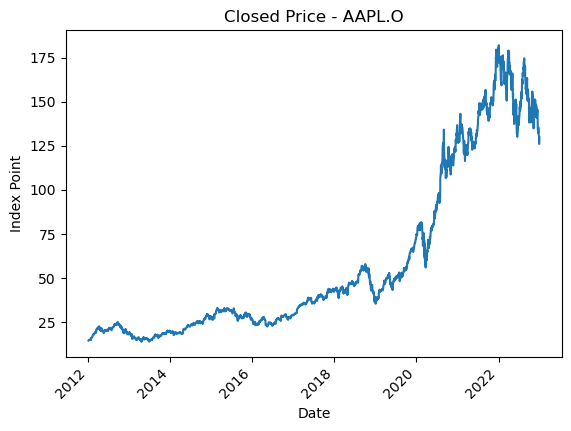

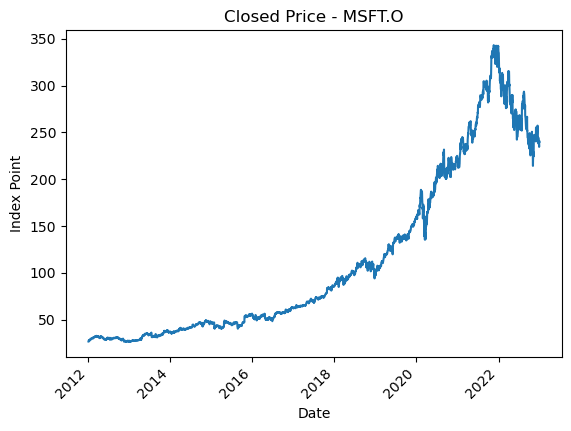

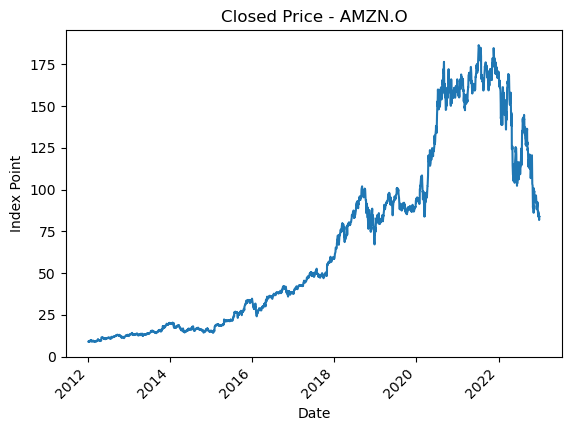

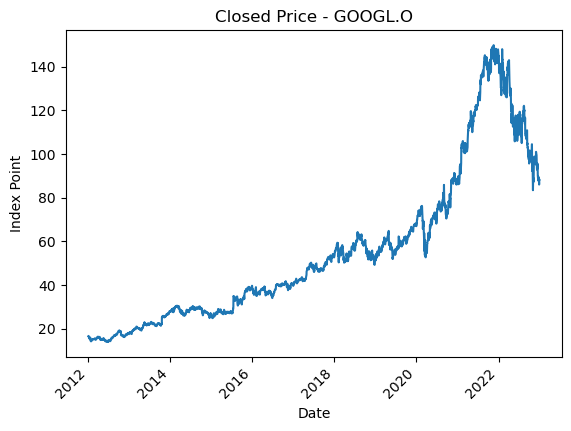

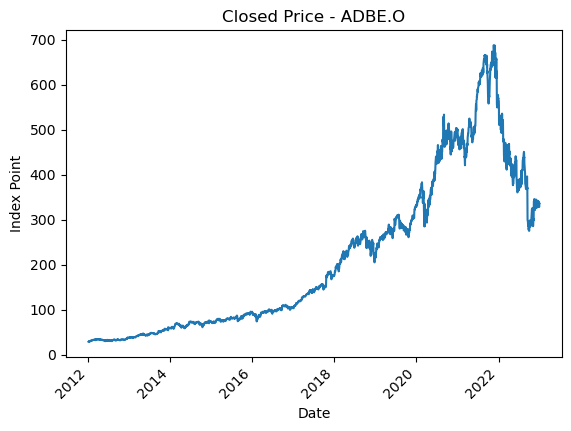

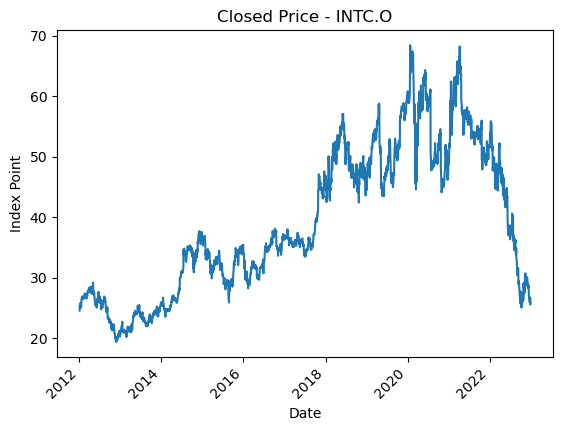

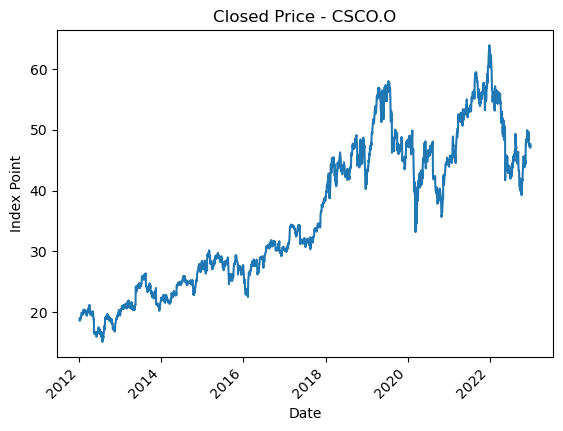

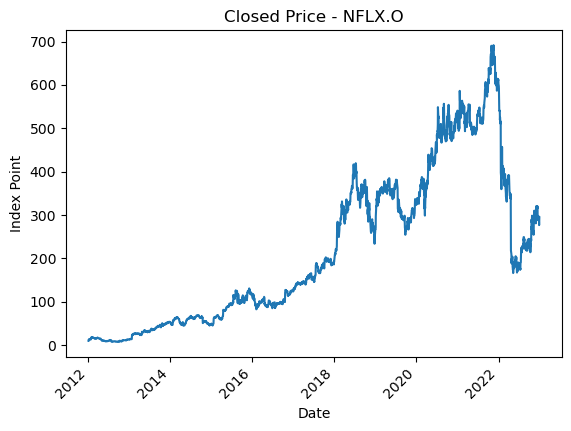

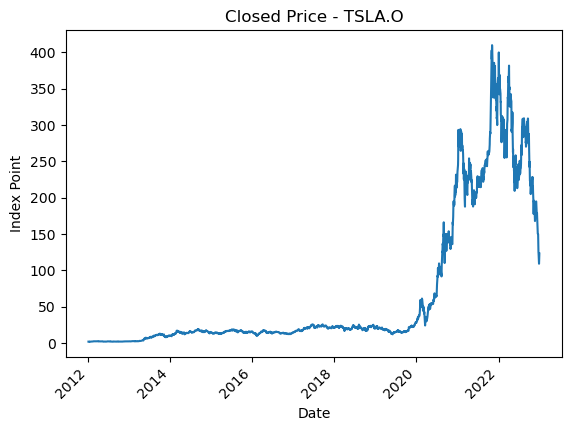

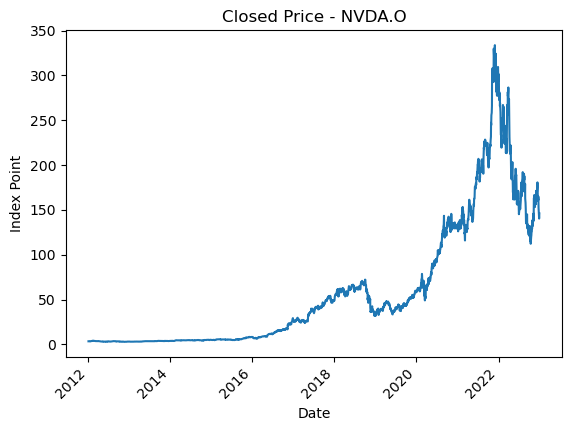

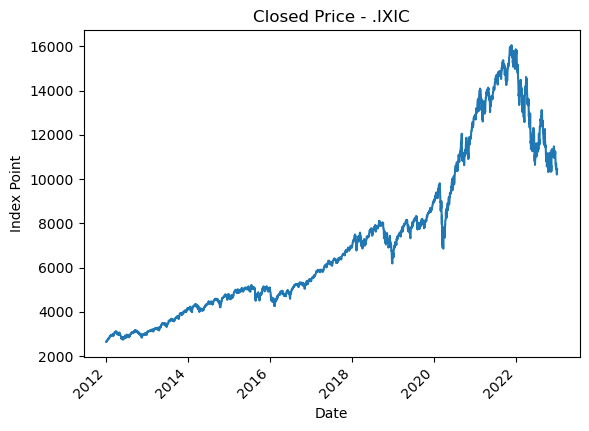

In [36]:
stocks = df.columns  # Exclude the first column (dates)

for stock in stocks:
    df[stock].plot(rot=45, legend=False)
    plt.xlabel('Date')
    plt.ylabel('Index Point')
    plt.title(f"Closed Price - {stock}")
    plt.show()

# 4. Calculate Simple Return

In [37]:
# Befor cleaning the data we first calculate the return, to get more precise results

In [38]:
df_returns = df.pct_change()
df_returns

,AAPL.O,MSFT.O,AMZN.O,GOOGL.O,ADBE.O,INTC.O,CSCO.O,NFLX.O,TSLA.O,NVDA.O,.IXIC
Date,,,,,,,,,,,
2012-01-03,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2012-01-04,0.005374,0.023725,-0.00849,0.004313,-0.010151,0.023227,0.019324,0.113649,-0.013177,0.011396,-0.000136
2012-01-05,0.011102,0.010219,0.000563,-0.013871,0.007072,0.011549,-0.003686,-0.014295,-0.021292,0.035915,0.008118
2012-01-06,0.010454,0.015354,0.028152,-0.013642,0.008427,-0.005906,-0.0037,0.088146,-0.007743,-0.011557,0.001633
2012-01-09,-0.001586,-0.012987,-0.022178,-0.042399,-0.006616,0.008515,0.006366,0.137791,0.012635,0.0,0.000875
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,-0.002798,0.002267,0.017425,0.01675,0.005735,0.004621,0.003381,-0.009353,-0.017551,-0.008671,0.002076
2022-12-27,-0.013878,-0.007414,-0.025924,-0.020621,-0.009928,-0.005749,0.001053,-0.036598,-0.114089,-0.071353,-0.013778
2022-12-28,-0.030685,-0.010255,-0.014692,-0.015677,-0.020174,-0.01542,-0.009678,-0.025654,0.033089,-0.006019,-0.013516


In [39]:
# Verify Data

# 5. Clean Data

In [40]:
# First: Clean Close Price Data

In [41]:
# Drop rows where at least one element per row is missing (Listwise Deletion)
df.dropna(axis="rows", inplace=True)
df

,AAPL.O,MSFT.O,AMZN.O,GOOGL.O,ADBE.O,INTC.O,CSCO.O,NFLX.O,TSLA.O,NVDA.O,.IXIC
Date,,,,,,,,,,,
2012-01-03,14.686771,26.765,8.9515,16.651386,28.57,24.54,18.63,10.31999,1.871998,3.51,2648.72
2012-01-04,14.7657,27.4,8.8755,16.723206,28.28,25.11,18.99,11.492846,1.847331,3.55,2648.36
2012-01-05,14.929628,27.68,8.8805,16.491231,28.48,25.4,18.92,11.32856,1.807998,3.6775,2669.86
2012-01-06,15.085699,28.105,9.1305,16.266263,28.72,25.25,18.85,12.327131,1.793998,3.635,2674.22
2012-01-09,15.061771,27.74,8.928,15.576595,28.53,25.465,18.97,14.0257,1.816665,3.635,2676.56
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,131.86,238.73,85.25,89.23,338.45,26.09,47.48,294.965,123.15,152.06,10497.863
2022-12-27,130.03,236.96,83.04,87.39,335.09,25.94,47.53,284.17,109.1,141.21,10353.226
2022-12-28,126.04,234.53,81.82,86.02,328.33,25.54,47.07,276.88,112.71,140.36,10213.288


In [42]:
# Before 2768 rows and know 2768 rows, so no rows where dropped

In [43]:
# Second: Clean Return Data

In [44]:
# Replace 0.0 with NA for Listwise Deletion
df_returns = df_returns.replace(0.0, np.nan)
df_returns

,AAPL.O,MSFT.O,AMZN.O,GOOGL.O,ADBE.O,INTC.O,CSCO.O,NFLX.O,TSLA.O,NVDA.O,.IXIC
Date,,,,,,,,,,,
2012-01-03,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2012-01-04,0.005374,0.023725,-0.00849,0.004313,-0.010151,0.023227,0.019324,0.113649,-0.013177,0.011396,-0.000136
2012-01-05,0.011102,0.010219,0.000563,-0.013871,0.007072,0.011549,-0.003686,-0.014295,-0.021292,0.035915,0.008118
2012-01-06,0.010454,0.015354,0.028152,-0.013642,0.008427,-0.005906,-0.0037,0.088146,-0.007743,-0.011557,0.001633
2012-01-09,-0.001586,-0.012987,-0.022178,-0.042399,-0.006616,0.008515,0.006366,0.137791,0.012635,<NA>,0.000875
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,-0.002798,0.002267,0.017425,0.01675,0.005735,0.004621,0.003381,-0.009353,-0.017551,-0.008671,0.002076
2022-12-27,-0.013878,-0.007414,-0.025924,-0.020621,-0.009928,-0.005749,0.001053,-0.036598,-0.114089,-0.071353,-0.013778
2022-12-28,-0.030685,-0.010255,-0.014692,-0.015677,-0.020174,-0.01542,-0.009678,-0.025654,0.033089,-0.006019,-0.013516


In [45]:
# Drop rows where at least one element per row is missing (Listwise Deletion)
df_returns.dropna(axis="rows", inplace=True)
df_returns

,AAPL.O,MSFT.O,AMZN.O,GOOGL.O,ADBE.O,INTC.O,CSCO.O,NFLX.O,TSLA.O,NVDA.O,.IXIC
Date,,,,,,,,,,,
2012-01-04,0.005374,0.023725,-0.00849,0.004313,-0.010151,0.023227,0.019324,0.113649,-0.013177,0.011396,-0.000136
2012-01-05,0.011102,0.010219,0.000563,-0.013871,0.007072,0.011549,-0.003686,-0.014295,-0.021292,0.035915,0.008118
2012-01-06,0.010454,0.015354,0.028152,-0.013642,0.008427,-0.005906,-0.0037,0.088146,-0.007743,-0.011557,0.001633
2012-01-10,0.00358,0.003605,0.004368,0.001092,0.023484,0.004909,-0.00738,-0.023936,0.013578,-0.004127,0.009692
2012-01-11,-0.00163,-0.00431,-0.002453,0.004525,0.00411,0.008206,0.012746,-0.038401,0.022085,-0.020028,0.003056
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,-0.002798,0.002267,0.017425,0.01675,0.005735,0.004621,0.003381,-0.009353,-0.017551,-0.008671,0.002076
2022-12-27,-0.013878,-0.007414,-0.025924,-0.020621,-0.009928,-0.005749,0.001053,-0.036598,-0.114089,-0.071353,-0.013778
2022-12-28,-0.030685,-0.010255,-0.014692,-0.015677,-0.020174,-0.01542,-0.009678,-0.025654,0.033089,-0.006019,-0.013516


In [46]:
# Befor 2768 rows now 2650 rows, meaning 118 rows where dropped

# 6. Upload Clean Data in SQL

In [47]:
# Install Packages
import sqlite3
import sqlalchemy

In [48]:
# Connect to Database
connection = sqlite3.connect("EventStudyDataBase.db")

In [49]:
cursor = connection.cursor()

In [50]:
# Crate Engine
engine = sqlalchemy.create_engine("sqlite:///EventStudyDataBase.db")

In [51]:
# Create Table with the close price df in IndicesDataBase
df.to_sql("ClosePrices",engine)

2768

In [52]:
# Show the created Table ClosePrice
pd.read_sql("ClosePrices", engine)

,Date,AAPL.O,MSFT.O,AMZN.O,GOOGL.O,ADBE.O,INTC.O,CSCO.O,NFLX.O,TSLA.O,NVDA.O,.IXIC
0,2012-01-03,14.686771,26.765,8.9515,16.651386,28.57,24.540,18.63,10.319990,1.871998,3.5100,2648.720
1,2012-01-04,14.765700,27.400,8.8755,16.723206,28.28,25.110,18.99,11.492846,1.847331,3.5500,2648.360
2,2012-01-05,14.929628,27.680,8.8805,16.491231,28.48,25.400,18.92,11.328560,1.807998,3.6775,2669.860
3,2012-01-06,15.085699,28.105,9.1305,16.266263,28.72,25.250,18.85,12.327131,1.793998,3.6350,2674.220
4,2012-01-09,15.061771,27.740,8.9280,15.576595,28.53,25.465,18.97,14.025700,1.816665,3.6350,2676.560
...,...,...,...,...,...,...,...,...,...,...,...,...
2763,2022-12-23,131.860000,238.730,85.2500,89.230000,338.45,26.090,47.48,294.965000,123.150000,152.0600,10497.863
2764,2022-12-27,130.030000,236.960,83.0400,87.390000,335.09,25.940,47.53,284.170000,109.100000,141.2100,10353.226
2765,2022-12-28,126.040000,234.530,81.8200,86.020000,328.33,25.540,47.07,276.880000,112.710000,140.3600,10213.288
2766,2022-12-29,129.610000,241.010,84.1800,88.450000,337.58,26.210,47.50,291.120000,121.820000,146.0300,10478.087


In [53]:
# Create Table with the df_returns Data in IndicesDataBase
df_returns.to_sql("Returns",engine)

2650

In [54]:
# Show the created Table Returns
pd.read_sql("Returns", engine)

,Date,AAPL.O,MSFT.O,AMZN.O,GOOGL.O,ADBE.O,INTC.O,CSCO.O,NFLX.O,TSLA.O,NVDA.O,.IXIC
0,2012-01-04,0.005374,0.023725,-0.008490,0.004313,-0.010151,0.023227,0.019324,0.113649,-0.013177,0.011396,-0.000136
1,2012-01-05,0.011102,0.010219,0.000563,-0.013871,0.007072,0.011549,-0.003686,-0.014295,-0.021292,0.035915,0.008118
2,2012-01-06,0.010454,0.015354,0.028152,-0.013642,0.008427,-0.005906,-0.003700,0.088146,-0.007743,-0.011557,0.001633
3,2012-01-10,0.003580,0.003605,0.004368,0.001092,0.023484,0.004909,-0.007380,-0.023936,0.013578,-0.004127,0.009692
4,2012-01-11,-0.001630,-0.004310,-0.002453,0.004525,0.004110,0.008206,0.012746,-0.038401,0.022085,-0.020028,0.003056
...,...,...,...,...,...,...,...,...,...,...,...,...
2645,2022-12-23,-0.002798,0.002267,0.017425,0.016750,0.005735,0.004621,0.003381,-0.009353,-0.017551,-0.008671,0.002076
2646,2022-12-27,-0.013878,-0.007414,-0.025924,-0.020621,-0.009928,-0.005749,0.001053,-0.036598,-0.114089,-0.071353,-0.013778
2647,2022-12-28,-0.030685,-0.010255,-0.014692,-0.015677,-0.020174,-0.015420,-0.009678,-0.025654,0.033089,-0.006019,-0.013516
2648,2022-12-29,0.028324,0.027630,0.028844,0.028249,0.028173,0.026233,0.009135,0.051430,0.080827,0.040396,0.025927


# 7. Upload SQL Data back to Python

In [55]:
# Insert Table ClosePrice into Python
c = connection.cursor()
c.execute("SELECT * FROM ClosePrices")
df_close=c.fetchall()
df_close

[('2012-01-03 00:00:00.000000',
  14.686771027500003,
  26.765,
  8.951500000000001,
  16.6513861925,
  28.57,
  24.54,
  18.63,
  10.31998968,
  1.871998128,
  3.51,
  2648.72),
 ('2012-01-04 00:00:00.000000',
  14.765699520000002,
  27.4,
  8.8755,
  16.723205789999998,
  28.28,
  25.11,
  18.99,
  11.492845650000001,
  1.8473314859999999,
  3.55,
  2648.36),
 ('2012-01-05 00:00:00.000000',
  14.9296279275,
  27.68,
  8.880500000000001,
  16.491230992499997,
  28.48,
  25.4,
  18.92,
  11.3285601,
  1.8079981920000003,
  3.6775,
  2669.86),
 ('2012-01-06 00:00:00.000000',
  15.0856992,
  28.105,
  9.130500000000001,
  16.266262984999997,
  28.72,
  25.25,
  18.85,
  12.327130530000002,
  1.793998206,
  3.635,
  2674.22),
 ('2012-01-09 00:00:00.000000',
  15.061770652500002,
  27.74,
  8.928,
  15.576594655000001,
  28.53,
  25.465,
  18.97,
  14.025700260000002,
  1.8166648500000002,
  3.635,
  2676.56),
 ('2012-01-10 00:00:00.000000',
  15.115699170000001,
  27.84,
  8.967,
  15.593

In [56]:
# Convert the Lists into a Dataframe
df_close=pd.DataFrame(df_close,columns=['Date', 'AAPL.O', 'MSFT.O', 'AMZN.O', 'GOOGL.O', 'ADBE.O', 'INTC.O', 'CSCO.O', 'NFLX.O', 'TSLA.O', 'NVDA.O','.IXIC'])
df_close.head()

,Date,AAPL.O,MSFT.O,AMZN.O,GOOGL.O,ADBE.O,INTC.O,CSCO.O,NFLX.O,TSLA.O,NVDA.O,.IXIC
0,2012-01-03 00:00:00.000000,14.686771,26.765,8.9515,16.651386,28.57,24.540,18.63,10.319990,1.871998,3.5100,2648.72
1,2012-01-04 00:00:00.000000,14.765700,27.400,8.8755,16.723206,28.28,25.110,18.99,11.492846,1.847331,3.5500,2648.36
2,2012-01-05 00:00:00.000000,14.929628,27.680,8.8805,16.491231,28.48,25.400,18.92,11.328560,1.807998,3.6775,2669.86
3,2012-01-06 00:00:00.000000,15.085699,28.105,9.1305,16.266263,28.72,25.250,18.85,12.327131,1.793998,3.6350,2674.22
4,2012-01-09 00:00:00.000000,15.061771,27.740,8.9280,15.576595,28.53,25.465,18.97,14.025700,1.816665,3.6350,2676.56


In [57]:
# Set Date as Index 
df_close.set_index('Date')

,AAPL.O,MSFT.O,AMZN.O,GOOGL.O,ADBE.O,INTC.O,CSCO.O,NFLX.O,TSLA.O,NVDA.O,.IXIC
Date,,,,,,,,,,,
2012-01-03 00:00:00.000000,14.686771,26.765,8.9515,16.651386,28.57,24.540,18.63,10.319990,1.871998,3.5100,2648.720
2012-01-04 00:00:00.000000,14.765700,27.400,8.8755,16.723206,28.28,25.110,18.99,11.492846,1.847331,3.5500,2648.360
2012-01-05 00:00:00.000000,14.929628,27.680,8.8805,16.491231,28.48,25.400,18.92,11.328560,1.807998,3.6775,2669.860
2012-01-06 00:00:00.000000,15.085699,28.105,9.1305,16.266263,28.72,25.250,18.85,12.327131,1.793998,3.6350,2674.220
2012-01-09 00:00:00.000000,15.061771,27.740,8.9280,15.576595,28.53,25.465,18.97,14.025700,1.816665,3.6350,2676.560
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00.000000,131.860000,238.730,85.2500,89.230000,338.45,26.090,47.48,294.965000,123.150000,152.0600,10497.863
2022-12-27 00:00:00.000000,130.030000,236.960,83.0400,87.390000,335.09,25.940,47.53,284.170000,109.100000,141.2100,10353.226
2022-12-28 00:00:00.000000,126.040000,234.530,81.8200,86.020000,328.33,25.540,47.07,276.880000,112.710000,140.3600,10213.288


In [58]:
# Insert Table Returns into Python
c.execute("SELECT * FROM Returns")
df_returns=c.fetchall()
df_returns

[('2012-01-04 00:00:00.000000',
  0.005374121537825571,
  0.023725014010834933,
  -0.008490197173658065,
  0.004313130250522157,
  -0.010150507525376273,
  0.023227383863080764,
  0.019323671497584405,
  0.11364894795127367,
  -0.013176638176638278,
  0.01139601139601143,
  -0.00013591470597107413),
 ('2012-01-05 00:00:00.000000',
  0.011101973684210398,
  0.010218978102189746,
  0.0005633485437441799,
  -0.013871431136649348,
  0.007072135785006983,
  0.011549183592194368,
  -0.0036861506055817506,
  -0.01429459291485402,
  -0.021291952363767352,
  0.03591549295774654,
  0.008118231660348307),
 ('2012-01-06 00:00:00.000000',
  0.010453795182163939,
  0.015354046242774588,
  0.02815156804233987,
  -0.013641674633161793,
  0.008426966292134797,
  -0.0059055118110236116,
  -0.0036997885835095,
  0.0881462799495587,
  -0.007743362831858613,
  -0.011556764106050443,
  0.0016330444292957935),
 ('2012-01-10 00:00:00.000000',
  0.0035804898868943003,
  0.0036049026676279183,
  0.0043682795698

In [59]:
# Convert the Lists into a Dataframe
df_returns=pd.DataFrame(df_returns,columns=['Date', 'AAPL.O', 'MSFT.O', 'AMZN.O', 'GOOGL.O', 'ADBE.O', 'INTC.O', 'CSCO.O', 'NFLX.O', 'TSLA.O', 'NVDA.O','.IXIC'])
df_returns.head()

,Date,AAPL.O,MSFT.O,AMZN.O,GOOGL.O,ADBE.O,INTC.O,CSCO.O,NFLX.O,TSLA.O,NVDA.O,.IXIC
0,2012-01-04 00:00:00.000000,0.005374,0.023725,-0.008490,0.004313,-0.010151,0.023227,0.019324,0.113649,-0.013177,0.011396,-0.000136
1,2012-01-05 00:00:00.000000,0.011102,0.010219,0.000563,-0.013871,0.007072,0.011549,-0.003686,-0.014295,-0.021292,0.035915,0.008118
2,2012-01-06 00:00:00.000000,0.010454,0.015354,0.028152,-0.013642,0.008427,-0.005906,-0.003700,0.088146,-0.007743,-0.011557,0.001633
3,2012-01-10 00:00:00.000000,0.003580,0.003605,0.004368,0.001092,0.023484,0.004909,-0.007380,-0.023936,0.013578,-0.004127,0.009692
4,2012-01-11 00:00:00.000000,-0.001630,-0.004310,-0.002453,0.004525,0.004110,0.008206,0.012746,-0.038401,0.022085,-0.020028,0.003056


In [60]:
# Set Date as Index 
df_returns.set_index('Date')

,AAPL.O,MSFT.O,AMZN.O,GOOGL.O,ADBE.O,INTC.O,CSCO.O,NFLX.O,TSLA.O,NVDA.O,.IXIC
Date,,,,,,,,,,,
2012-01-04 00:00:00.000000,0.005374,0.023725,-0.008490,0.004313,-0.010151,0.023227,0.019324,0.113649,-0.013177,0.011396,-0.000136
2012-01-05 00:00:00.000000,0.011102,0.010219,0.000563,-0.013871,0.007072,0.011549,-0.003686,-0.014295,-0.021292,0.035915,0.008118
2012-01-06 00:00:00.000000,0.010454,0.015354,0.028152,-0.013642,0.008427,-0.005906,-0.003700,0.088146,-0.007743,-0.011557,0.001633
2012-01-10 00:00:00.000000,0.003580,0.003605,0.004368,0.001092,0.023484,0.004909,-0.007380,-0.023936,0.013578,-0.004127,0.009692
2012-01-11 00:00:00.000000,-0.001630,-0.004310,-0.002453,0.004525,0.004110,0.008206,0.012746,-0.038401,0.022085,-0.020028,0.003056
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00.000000,-0.002798,0.002267,0.017425,0.016750,0.005735,0.004621,0.003381,-0.009353,-0.017551,-0.008671,0.002076
2022-12-27 00:00:00.000000,-0.013878,-0.007414,-0.025924,-0.020621,-0.009928,-0.005749,0.001053,-0.036598,-0.114089,-0.071353,-0.013778
2022-12-28 00:00:00.000000,-0.030685,-0.010255,-0.014692,-0.015677,-0.020174,-0.015420,-0.009678,-0.025654,0.033089,-0.006019,-0.013516


# 8. Normality Test: Shapiro-Wilk

In [61]:
# Install Packages
import statsmodels.api as sm
import pylab
import statistics 

In [62]:
# The null hypothesis H0 states: the data is normally distributed
# If the H0 is not rejected the data is normally distributed otherwise its not normally distributed

In [63]:
# Normaility Test for Closed Prices

In [64]:
stocks = df_close.columns[1:]  # Exclude the first column (dates)

for stock in stocks:
    stock_data = pd.DataFrame(df_close[stock])
    stat, p = sp.stats.shapiro(stock_data)
    
    print(f"Stock: {stock}")
    print("p-value for Shapiro-Wilk: ")
    print(p)
    
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
    
    print()

Stock: AAPL.O
p-value for Shapiro-Wilk: 
0.0
Sample does not look Gaussian (reject H0)

Stock: MSFT.O
p-value for Shapiro-Wilk: 
0.0
Sample does not look Gaussian (reject H0)

Stock: AMZN.O
p-value for Shapiro-Wilk: 
5.05868745621259e-43
Sample does not look Gaussian (reject H0)

Stock: GOOGL.O
p-value for Shapiro-Wilk: 
3.653185096494798e-42
Sample does not look Gaussian (reject H0)

Stock: ADBE.O
p-value for Shapiro-Wilk: 
1.516204938399452e-42
Sample does not look Gaussian (reject H0)

Stock: INTC.O
p-value for Shapiro-Wilk: 
2.0200859134135243e-30
Sample does not look Gaussian (reject H0)

Stock: CSCO.O
p-value for Shapiro-Wilk: 
8.959176543838742e-32
Sample does not look Gaussian (reject H0)

Stock: NFLX.O
p-value for Shapiro-Wilk: 
2.1299712835663326e-38
Sample does not look Gaussian (reject H0)

Stock: TSLA.O
p-value for Shapiro-Wilk: 
0.0
Sample does not look Gaussian (reject H0)

Stock: NVDA.O
p-value for Shapiro-Wilk: 
0.0
Sample does not look Gaussian (reject H0)

Stock: .IX

In [65]:
# Normaility Test for Returns

In [66]:
returns = df_returns.columns[1:]  # Exclude the first column (dates)

for return_ in returns:
    return_data = pd.DataFrame(df_returns[return_])
    stat, p = sp.stats.shapiro(return_data)
    
    print(f"Return: {return_}")
    print("p-value for Shapiro-Wilk: ")
    print(p)
    
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
    
    print()

Return: AAPL.O
p-value for Shapiro-Wilk: 
7.898579125096052e-31
Sample does not look Gaussian (reject H0)

Return: MSFT.O
p-value for Shapiro-Wilk: 
4.064896486327859e-35
Sample does not look Gaussian (reject H0)

Return: AMZN.O
p-value for Shapiro-Wilk: 
2.1056724150677273e-35
Sample does not look Gaussian (reject H0)

Return: GOOGL.O
p-value for Shapiro-Wilk: 
3.715001237064434e-35
Sample does not look Gaussian (reject H0)

Return: ADBE.O
p-value for Shapiro-Wilk: 
4.1201537967464e-37
Sample does not look Gaussian (reject H0)

Return: INTC.O
p-value for Shapiro-Wilk: 
1.4060796946850933e-39
Sample does not look Gaussian (reject H0)

Return: CSCO.O
p-value for Shapiro-Wilk: 
1.525747780941504e-40
Sample does not look Gaussian (reject H0)

Return: NFLX.O
p-value for Shapiro-Wilk: 
1.2611686178923354e-44
Sample does not look Gaussian (reject H0)

Return: TSLA.O
p-value for Shapiro-Wilk: 
2.6359228384831357e-33
Sample does not look Gaussian (reject H0)

Return: NVDA.O
p-value for Shapiro

# 9. Test Stocks Prices and Stocks Returns for Stationarity

In [67]:
# Install Packages
from statsmodels.tsa.stattools import adfuller

In [68]:
# Test Close Prices

In [69]:
stocks = df_close.columns[1:]  # Exclude the first column (dates)

for stock in stocks:
    X = df_close[stock].values
    result = adfuller(X)
    print(f"Stock: {stock}")
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if result[0] < result[4]["5%"]:
        print("Reject Ho - Time Series is Stationary")
    else:
        print("Failed to Reject Ho - Time Series is Non-Stationary")
    
    print()

Stock: AAPL.O
ADF Statistic: -0.400826
p-value: 0.909961
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Failed to Reject Ho - Time Series is Non-Stationary

Stock: MSFT.O
ADF Statistic: -0.179751
p-value: 0.940893
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Failed to Reject Ho - Time Series is Non-Stationary

Stock: AMZN.O
ADF Statistic: -1.133484
p-value: 0.701536
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Failed to Reject Ho - Time Series is Non-Stationary

Stock: GOOGL.O
ADF Statistic: -0.874184
p-value: 0.796355
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Failed to Reject Ho - Time Series is Non-Stationary

Stock: ADBE.O
ADF Statistic: -1.084826
p-value: 0.721085
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Failed to Reject Ho - Time Series is Non-Stationary

Stock: INTC.O
ADF Statistic: -1.745855
p-value: 0.407655
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Failed to Reject Ho - Time Series is Non-Stationary

Stock: CSCO.O
A

In [70]:
# Test Returns

In [71]:
returns = df_returns.columns[1:]  # Exclude the first column (dates)

for return_ in returns:
    X = df_returns[return_].values
    result = adfuller(X)
    print(f"Return: {return_}")
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if result[0] < result[4]["5%"]:
        print("Reject Ho - Time Series is Stationary")
    else:
        print("Failed to Reject Ho - Time Series is Non-Stationary")
    
    print()

Return: AAPL.O
ADF Statistic: -16.734263
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Reject Ho - Time Series is Stationary

Return: MSFT.O
ADF Statistic: -18.376482
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Reject Ho - Time Series is Stationary

Return: AMZN.O
ADF Statistic: -51.938859
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Reject Ho - Time Series is Stationary

Return: GOOGL.O
ADF Statistic: -17.812985
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Reject Ho - Time Series is Stationary

Return: ADBE.O
ADF Statistic: -17.911654
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Reject Ho - Time Series is Stationary

Return: INTC.O
ADF Statistic: -16.598225
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Reject Ho - Time Series is Stationary

Return: CSCO.O
ADF Statistic: -12.054857
p-value: 0.000000
Critical Values:
	1%: -3.433

# 10. Import Further Data for Event Study

In [72]:
# Import simple returns

In [73]:
csv_returns = pd.read_csv("returns.csv",
                             usecols = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
csv_returns.head()

,date,AAPL.O,MSFT.O,AMZN.O,GOOGL.O,ADBE.O,INTC.O,CSCO.O,NFLX.O,TSLA.O,NVDA.O,.IXIC
0,2012-01-04,0.005374,0.023725,-0.008490,0.004313,-0.010151,0.023227,0.019324,0.113649,-0.013177,0.011396,-0.000136
1,2012-01-05,0.011102,0.010219,0.000563,-0.013871,0.007072,0.011549,-0.003686,-0.014295,-0.021292,0.035915,0.008118
2,2012-01-06,0.010454,0.015354,0.028152,-0.013642,0.008427,-0.005906,-0.003700,0.088146,-0.007743,-0.011557,0.001633
3,2012-01-10,0.003580,0.003605,0.004368,0.001092,0.023484,0.004909,-0.007380,-0.023936,0.013578,-0.004127,0.009692
4,2012-01-11,-0.001630,-0.004310,-0.002453,0.004525,0.004110,0.008206,0.012746,-0.038401,0.022085,-0.020028,0.003056


In [74]:
# Import Fama and French Returns
# Daily data downloaded from the FamaFrench library: https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_daily_CSV.zip

In [75]:
csv_FamaFrench = pd.read_csv("famafrench.csv",
                             usecols = [0, 1, 2, 3, 4])
csv_FamaFrench.head()

,date,Mkt-RF,SMB,HML,RF
0,19260701,0.10,-0.25,-0.27,0.009
1,19260702,0.45,-0.33,-0.06,0.009
2,19260706,0.17,0.30,-0.39,0.009
3,19260707,0.09,-0.58,0.02,0.009
4,19260708,0.21,-0.38,0.19,0.009


In [76]:
# Import 10K marketmodel

In [77]:
csv_10K = pd.read_csv("10K.csv",
                             usecols = [0, 1, 2])
csv_10K.head()

,security_ticker,market_ticker,event_date
0,AAPL.O,.IXIC,01/24/2012
1,AAPL.O,.IXIC,03/13/2012
2,AAPL.O,.IXIC,04/24/2012
3,AAPL.O,.IXIC,06/19/2012
4,AAPL.O,.IXIC,07/31/2012


# Descriptive Statistics

In [78]:
# Descriptive statistics of simple returns

In [79]:
description = df_returns.describe()

# Print the description
print(description)

            AAPL.O       MSFT.O       AMZN.O      GOOGL.O       ADBE.O  \
count  2650.000000  2650.000000  2650.000000  2650.000000  2650.000000   
mean      0.000930     0.000889     0.001024     0.000756     0.001132   
std       0.018450     0.016919     0.020642     0.017055     0.019738   
min      -0.128647    -0.147390    -0.140494    -0.116342    -0.167932   
25%      -0.007734    -0.007033    -0.008805    -0.007092    -0.007488   
50%       0.000765     0.000698     0.000899     0.000784     0.001396   
75%       0.010512     0.009410     0.011204     0.009208     0.010834   
max       0.119808     0.142169     0.157457     0.162584     0.177193   

            INTC.O       CSCO.O       NFLX.O       TSLA.O       NVDA.O  \
count  2650.000000  2650.000000  2650.000000  2650.000000  2650.000000   
mean      0.000232     0.000493     0.001662     0.002019     0.001735   
std       0.019142     0.016310     0.031071     0.036154     0.027661   
min      -0.180415    -0.137304    -0

In [80]:
# Show distribution of simple returns

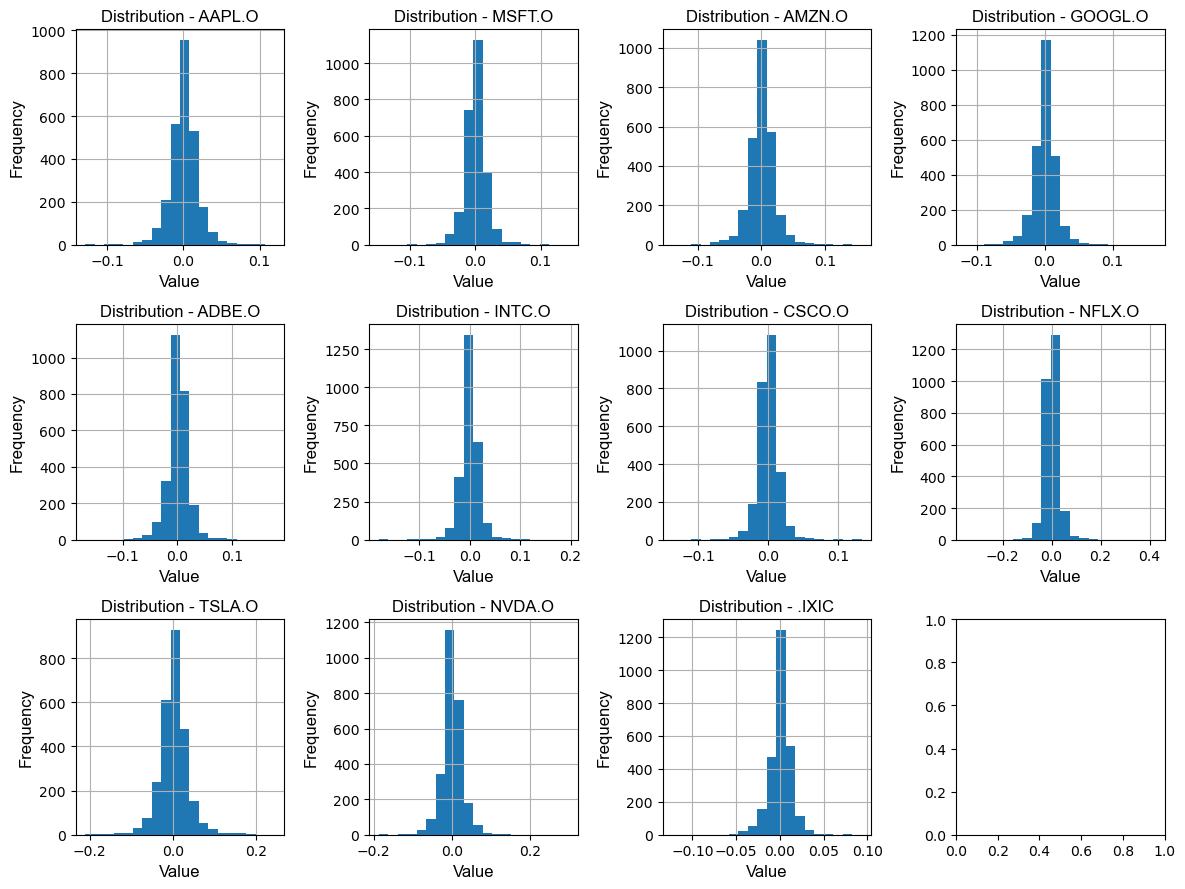

In [81]:
font = {'family': 'Arial', 'weight': 'normal', 'size': 12}
# Create a new DataFrame without modifying the original DataFrame
df_returns_plot = df_returns.drop('Date', axis=1, inplace=False)

fig,axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 9))

    # Flatten the axes array for easier iteration
axes = axes.flatten()


# Iterate over the columns of df_returns_plot and create histograms
for i, column in enumerate(df_returns_plot.columns):
    ax = axes[i]
    df_returns_plot[column].hist(ax=ax, bins=20)  # Adjust the number of bins as needed

    # Set font properties for various elements
    ax.set_xlabel('Value', fontdict=font)
    ax.set_ylabel('Frequency', fontdict=font)
    ax.set_title(f'Distribution - {column}', fontdict=font)
    ax.tick_params(axis='both', which='major', labelsize=10)

# Adjust figure layout and spacing
plt.tight_layout()

# Show the plot
plt.show()


In [82]:
# Plot Fama-French Time Series 

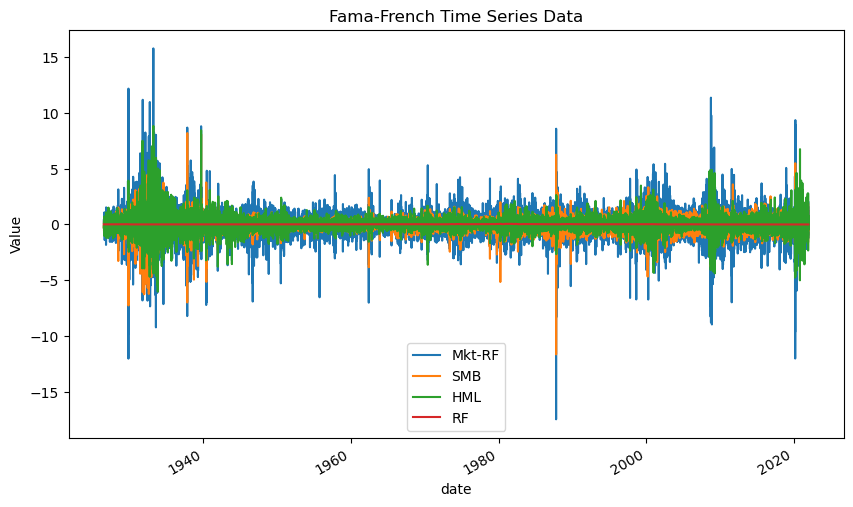

In [83]:
# Read the CSV file into a DataFrame
df_famafrench = pd.read_csv("famafrench.csv")

# Convert the 'Date' column to datetime with the appropriate format
df_famafrench['date'] = pd.to_datetime(df_famafrench['date'], format='%Y%m%d')

# Set the 'Date' column as the index
df_famafrench.set_index('date', inplace=True)

# Plot the time series data
df_famafrench.plot(figsize=(10, 6))

# Set labels and title
plt.xlabel('date')
plt.ylabel('Value')
plt.title('Fama-French Time Series Data')

# Show the plot
plt.show()

# 12. Upload New Data in SQL

In [84]:
# Create Table with the simplereturns in IndicesDataBase
csv_returns.to_sql("simplereturns",engine)
# Show the created Table simple returns
pd.read_sql("simplereturns", engine)

,index,date,AAPL.O,MSFT.O,AMZN.O,GOOGL.O,ADBE.O,INTC.O,CSCO.O,NFLX.O,TSLA.O,NVDA.O,.IXIC
0,0,2012-01-04,0.005374,0.023725,-0.008490,0.004313,-0.010151,0.023227,0.019324,0.113649,-0.013177,0.011396,-0.000136
1,1,2012-01-05,0.011102,0.010219,0.000563,-0.013871,0.007072,0.011549,-0.003686,-0.014295,-0.021292,0.035915,0.008118
2,2,2012-01-06,0.010454,0.015354,0.028152,-0.013642,0.008427,-0.005906,-0.003700,0.088146,-0.007743,-0.011557,0.001633
3,3,2012-01-10,0.003580,0.003605,0.004368,0.001092,0.023484,0.004909,-0.007380,-0.023936,0.013578,-0.004127,0.009692
4,4,2012-01-11,-0.001630,-0.004310,-0.002453,0.004525,0.004110,0.008206,0.012746,-0.038401,0.022085,-0.020028,0.003056
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2645,2645,2022-12-23,-0.002798,0.002267,0.017425,0.016750,0.005735,0.004621,0.003381,-0.009353,-0.017551,-0.008671,0.002076
2646,2646,2022-12-27,-0.013878,-0.007414,-0.025924,-0.020621,-0.009928,-0.005749,0.001053,-0.036598,-0.114089,-0.071353,-0.013778
2647,2647,2022-12-28,-0.030685,-0.010255,-0.014692,-0.015677,-0.020174,-0.015420,-0.009678,-0.025654,0.033089,-0.006019,-0.013516
2648,2648,2022-12-29,0.028324,0.027630,0.028844,0.028249,0.028173,0.026233,0.009135,0.051430,0.080827,0.040396,0.025927


In [85]:
# Create Table with the FamaFrench in IndicesDataBase
csv_FamaFrench.to_sql("FamaFrench",engine)
# Show the created Table FamaFrench
pd.read_sql("FamaFrench", engine)

,index,date,Mkt-RF,SMB,HML,RF
0,0,19260701,0.10,-0.25,-0.27,0.009
1,1,19260702,0.45,-0.33,-0.06,0.009
2,2,19260706,0.17,0.30,-0.39,0.009
3,3,19260707,0.09,-0.58,0.02,0.009
4,4,19260708,0.21,-0.38,0.19,0.009
...,...,...,...,...,...,...
25143,25143,20211227,1.22,-0.11,0.29,0.000
25144,25144,20211228,-0.27,-0.60,0.81,0.000
25145,25145,20211229,0.06,-0.07,0.17,0.000
25146,25146,20211230,-0.15,0.10,-0.40,0.000


In [86]:
# Create Table with the 10K in IndicesDataBase
csv_10K.to_sql("marketmodel",engine)
# Show the created Table 10K
pd.read_sql("marketmodel", engine)

,index,security_ticker,market_ticker,event_date
0,0,AAPL.O,.IXIC,01/24/2012
1,1,AAPL.O,.IXIC,03/13/2012
2,2,AAPL.O,.IXIC,04/24/2012
3,3,AAPL.O,.IXIC,06/19/2012
4,4,AAPL.O,.IXIC,07/31/2012
...,...,...,...,...
855,855,NVDA.O,.IXIC,06/15/2021
856,856,NVDA.O,.IXIC,07/27/2021
857,857,NVDA.O,.IXIC,09/21/2021
858,858,NVDA.O,.IXIC,11/02/2021


# 13. Upload New SQL Data back to Python

In [87]:
# Insert Table simplereturns into Python
c = connection.cursor()
c.execute("SELECT * FROM simplereturns")
csv_simplereturns1=c.fetchall()
csv_simplereturns1

[(0,
  '2012-01-04',
  0.0053741215378255,
  0.0237250140108349,
  -0.008490197173658,
  0.0043131302505221,
  -0.0101505075253762,
  0.0232273838630807,
  0.0193236714975844,
  0.1136489479512736,
  -0.0131766381766382,
  0.0113960113960114,
  -0.000135914705971),
 (1,
  '2012-01-05',
  0.0111019736842103,
  0.0102189781021897,
  0.0005633485437441,
  -0.0138714311366493,
  0.0070721357850069,
  0.0115491835921943,
  -0.0036861506055817,
  -0.014294592914854,
  -0.0212919523637673,
  0.0359154929577465,
  0.0081182316603483),
 (2,
  '2012-01-06',
  0.0104537951821639,
  0.0153540462427745,
  0.0281515680423398,
  -0.0136416746331617,
  0.0084269662921347,
  -0.0059055118110236,
  -0.0036997885835095,
  0.0881462799495587,
  -0.0077433628318586,
  -0.0115567641060504,
  0.0016330444292957),
 (3,
  '2012-01-10',
  0.0035804898868943,
  0.0036049026676279,
  0.0043682795698924,
  0.0010924396748384,
  0.023484051875219,
  0.0049086982132338,
  -0.007380073800738,
  -0.0239356284375638,
 

In [88]:
# Insert Table FamaFrench into Python
c = connection.cursor()
c.execute("SELECT * FROM FamaFrench")
csv_FamaFrench1=c.fetchall()
csv_FamaFrench1

[(0, 19260701, 0.1, -0.25, -0.27, 0.009),
 (1, 19260702, 0.45, -0.33, -0.06, 0.009),
 (2, 19260706, 0.17, 0.3, -0.39, 0.009),
 (3, 19260707, 0.09, -0.58, 0.02, 0.009),
 (4, 19260708, 0.21, -0.38, 0.19, 0.009),
 (5, 19260709, -0.71, 0.43, 0.57, 0.009),
 (6, 19260710, 0.62, -0.53, -0.1, 0.009),
 (7, 19260712, 0.04, -0.03, 0.64, 0.009),
 (8, 19260713, 0.48, -0.28, -0.2, 0.009),
 (9, 19260714, 0.04, 0.07, -0.43, 0.009),
 (10, 19260715, -0.43, 0.49, -0.22, 0.009),
 (11, 19260716, 0.53, -0.07, -0.44, 0.009),
 (12, 19260717, 0.34, 0.43, -0.62, 0.009),
 (13, 19260719, -0.01, -0.04, -0.42, 0.009),
 (14, 19260720, -0.57, -0.25, 0.19, 0.009),
 (15, 19260721, -0.6, 0.18, 0.36, 0.009),
 (16, 19260722, -0.73, -0.27, -0.23, 0.009),
 (17, 19260723, -0.02, 0.09, 0.04, 0.009),
 (18, 19260724, -0.14, 0.44, -0.05, 0.009),
 (19, 19260726, 0.53, -0.39, -0.22, 0.009),
 (20, 19260727, 0.43, -0.41, 0.2, 0.009),
 (21, 19260728, 1.09, 0.02, -0.25, 0.009),
 (22, 19260729, 0.36, -0.6, -1.04, 0.009),
 (23, 19260730

In [89]:
# Insert Table marketmodel into Python
c = connection.cursor()
c.execute("SELECT * FROM marketmodel")
csv_marketmodel1=c.fetchall()
csv_marketmodel1

[(0, 'AAPL.O', '.IXIC', '01/24/2012'),
 (1, 'AAPL.O', '.IXIC', '03/13/2012'),
 (2, 'AAPL.O', '.IXIC', '04/24/2012'),
 (3, 'AAPL.O', '.IXIC', '06/19/2012'),
 (4, 'AAPL.O', '.IXIC', '07/31/2012'),
 (5, 'AAPL.O', '.IXIC', '09/12/2012'),
 (6, 'AAPL.O', '.IXIC', '10/23/2012'),
 (7, 'AAPL.O', '.IXIC', '12/11/2012'),
 (8, 'AAPL.O', '.IXIC', '01/29/2013'),
 (9, 'AAPL.O', '.IXIC', '03/19/2013'),
 (10, 'AAPL.O', '.IXIC', '04/30/2013'),
 (11, 'AAPL.O', '.IXIC', '06/18/2013'),
 (12, 'AAPL.O', '.IXIC', '07/30/2013'),
 (13, 'AAPL.O', '.IXIC', '09/17/2013'),
 (14, 'AAPL.O', '.IXIC', '10/16/2013'),
 (15, 'AAPL.O', '.IXIC', '10/29/2013'),
 (16, 'AAPL.O', '.IXIC', '12/17/2013'),
 (17, 'AAPL.O', '.IXIC', '01/28/2014'),
 (18, 'AAPL.O', '.IXIC', '03/04/2014'),
 (19, 'AAPL.O', '.IXIC', '03/18/2014'),
 (20, 'AAPL.O', '.IXIC', '04/29/2014'),
 (21, 'AAPL.O', '.IXIC', '06/17/2014'),
 (22, 'AAPL.O', '.IXIC', '07/29/2014'),
 (23, 'AAPL.O', '.IXIC', '09/16/2014'),
 (24, 'AAPL.O', '.IXIC', '10/28/2014'),
 (25, 'AAP

# 14. Event Study 3 event windows, 3 estimation sizes

In [90]:
# Preliminary work

In [91]:
import eventstudy as es
import csv

In [92]:
df_returns['Date'] = pd.to_datetime(df_returns['Date']).dt.date
df_returns.rename(columns={'Date': 'date'}, inplace=True)
df_returns.to_csv('returns.csv', index=False)

In [93]:
#Import Fama-French factors and Returns from a csv file to the Single Class parameters.
es.Single.import_returns("returns.csv") 
es.Single.import_FamaFrench("famafrench.csv") 

# Multiple Events Preparation

In [94]:
df = pd.read_csv('10K.csv')

# Convert the date column to np.datetime64 format
df['event_date'] = pd.to_datetime(df['event_date']).dt.strftime('%Y-%m-%d')
df['event_date'] = np.array(df['event_date'], dtype='datetime64')
events_db = df.to_dict('records')

In [95]:
# An aggregate of events
release_10K = es.Multiple.from_csv(
    path = '10K.csv', # the path to the csv file created
    event_study_model = es.Single.market_model,
    event_window = (-5,+10),
    estimation_size = 200,
    buffer_size = 30,
    date_format = '%m/%d/%Y',
    ignore_errors = True
)

2023-06-05 22:17:27,731 P[20506] [MainThread 140704694428480]  80 events have not been processed due to data issues.
Tips: Get more details on errors by calling Multiple.error_report() method or by exploring Multiple.errors class variable.


# Multiple Events using Loop for 10 Companies

# No 1. Event window (-5, +10), Estimation size = 200

In [96]:
tickers = ['AAPL.O', 'MSFT.O', 'AMZN.O', 'GOOGL.O', 'ADBE.O', 'INTC.O', 'CSCO.O', 'NFLX.O', 'TSLA.O', 'NVDA.O']
releases = dict()

for ticker in tickers:
    events = [event for event in events_db if event['security_ticker']==ticker]
    
    estimation_size = 200
    
    releases[ticker] = es.Multiple.from_list(
        events,
        es.Single.FamaFrench_3factor,
        event_window= (-5,+10)
    )

2023-06-05 22:17:33,164 P[20506] [MainThread 140704694428480]  11 events have not been processed due to data issues.
Tips: Get more details on errors by calling Multiple.error_report() method or by exploring Multiple.errors class variable.
2023-06-05 22:17:33,302 P[20506] [MainThread 140704694428480]  11 events have not been processed due to data issues.
Tips: Get more details on errors by calling Multiple.error_report() method or by exploring Multiple.errors class variable.
2023-06-05 22:17:33,434 P[20506] [MainThread 140704694428480]  11 events have not been processed due to data issues.
Tips: Get more details on errors by calling Multiple.error_report() method or by exploring Multiple.errors class variable.
2023-06-05 22:17:33,591 P[20506] [MainThread 140704694428480]  11 events have not been processed due to data issues.
Tips: Get more details on errors by calling Multiple.error_report() method or by exploring Multiple.errors class variable.
2023-06-05 22:17:33,752 P[20506] [MainTh

In [97]:
print(release_10K.error_report())

Error Report

80 errors due to data unavailability.
The respective events was not processed and thus removed from the sample.
It does not affect the computation of other events.

Help 1: Check if the company was quoted at this date, 
Help 2: For event study modelised used Fama-French models,
        check if the Fama-French dataset imported is up-to-date.
Tips:   Re-import all parameters and re-run the event study analysis.

Details
(You can find more details on errors in the documentation.)

Error            Date                       Parameters                                  
---------------- -------------------------- ----------------------------------------------
DataMissingError 2012-01-24T00:00:00.000000 security_ticker: AAPL.O; market_ticker: .IXIC 
Description: Some data are missing for (AAPL.O) in 'returns''.

DataMissingError 2012-03-13T00:00:00.000000 security_ticker: AAPL.O; market_ticker: .IXIC 
Description: Some data are missing for (AAPL.O) in 'returns''.

DataMissingE

AAPL.O


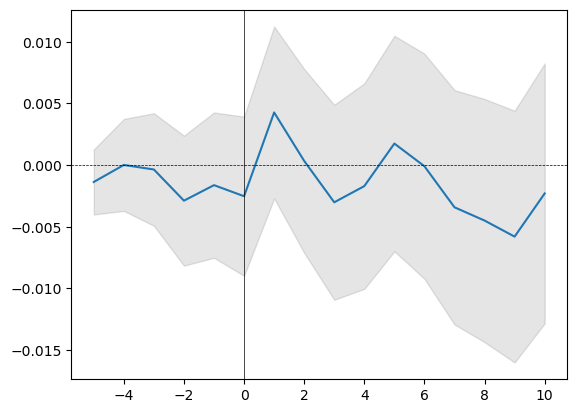

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-5,-0.001,0.002,-0.001,0.002,-0.666,0.506
-4,0.001,0.002,0.0,0.003,0.004,0.997
-3,-0.000,0.002,-0.0,0.004,-0.100,0.920
-2,-0.003,0.002,-0.003,0.004,-0.701,0.483
-1,0.001,0.002,-0.002,0.005,-0.353,0.724
0,-0.001,0.002,-0.003,0.005,-0.501,0.616
1,0.007,0.002,0.004,0.005,0.785,0.433
2,-0.004,0.002,0.0,0.006,0.058,0.954
3,-0.003,0.002,-0.003,0.006,-0.489,0.625
4,0.001,0.002,-0.002,0.007,-0.262,0.793


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-5,-0.001,0.001,6.600,-1.498,-0.107,-0.007,-0.000,0.010,0.061
-4,0.000,0.001,1.511,-0.408,-0.074,-0.011,0.002,0.013,0.063
-3,-0.000,0.001,0.984,0.042,-0.084,-0.018,0.001,0.018,0.096
-2,-0.003,0.002,0.633,-0.152,-0.111,-0.020,-0.003,0.020,0.099
-1,-0.002,0.002,1.444,-0.325,-0.148,-0.018,-0.002,0.021,0.125
0,-0.003,0.002,1.175,-0.457,-0.158,-0.021,0.002,0.025,0.122
1,0.004,0.002,-0.826,-0.313,-0.090,-0.027,0.014,0.041,0.097
2,0.000,0.003,-0.563,-0.296,-0.115,-0.035,0.004,0.035,0.107
3,-0.003,0.004,-0.299,-0.476,-0.146,-0.031,0.005,0.044,0.109
4,-0.002,0.005,-0.313,-0.411,-0.166,-0.044,0.004,0.055,0.151


MSFT.O


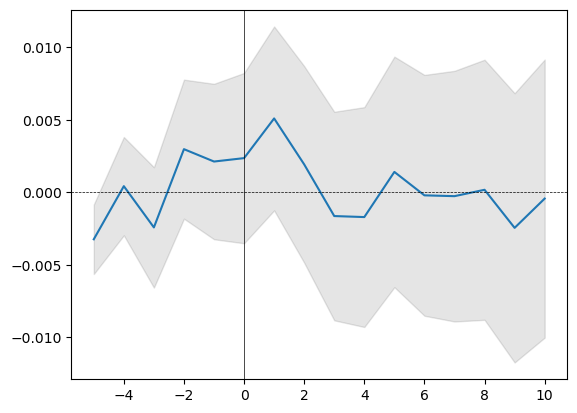

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-5,-0.003,0.002,-0.003 *,0.002,-1.734,0.083
-4,0.004,0.002,0.0,0.003,0.159,0.874
-3,-0.003,0.002,-0.002,0.003,-0.749,0.454
-2,0.005,0.002,0.003,0.004,0.795,0.427
-1,-0.001,0.002,0.002,0.004,0.507,0.612
0,0.000,0.002,0.002,0.005,0.514,0.607
1,0.003,0.002,0.005,0.005,1.029,0.304
2,-0.003,0.002,0.002,0.005,0.363,0.717
3,-0.004,0.002,-0.002,0.006,-0.292,0.770
4,-0.000,0.002,-0.002,0.006,-0.289,0.772


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-5,-0.003,0.001,10.641,-2.161,-0.128,-0.012,-0.001,0.007,0.059
-4,0.000,0.000,0.727,0.246,-0.056,-0.013,0.001,0.012,0.064
-3,-0.002,0.001,0.727,-0.319,-0.088,-0.016,-0.001,0.015,0.066
-2,0.003,0.002,0.861,-0.030,-0.114,-0.016,-0.000,0.027,0.111
-1,0.002,0.002,1.156,0.465,-0.104,-0.022,-0.002,0.029,0.135
0,0.002,0.002,1.072,0.111,-0.119,-0.020,0.001,0.023,0.141
1,0.005,0.002,0.972,0.217,-0.117,-0.024,0.003,0.034,0.141
2,0.002,0.002,0.679,0.067,-0.132,-0.021,-0.002,0.027,0.132
3,-0.002,0.002,0.775,-0.298,-0.137,-0.025,-0.001,0.026,0.132
4,-0.002,0.003,0.713,-0.186,-0.155,-0.028,-0.001,0.026,0.124


AMZN.O


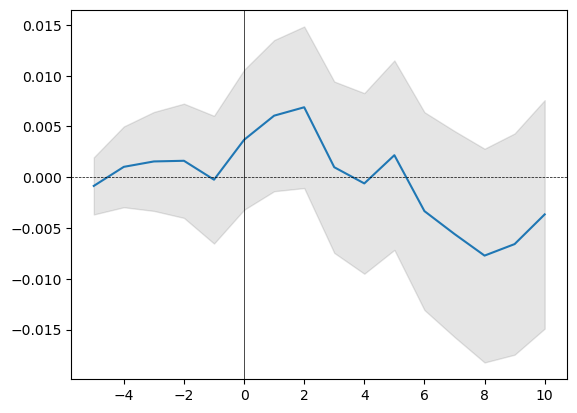

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-5,-0.001,0.002,-0.001,0.002,-0.390,0.697
-4,0.002,0.002,0.001,0.003,0.330,0.742
-3,0.001,0.002,0.002,0.004,0.409,0.683
-2,0.000,0.002,0.002,0.004,0.369,0.712
-1,-0.002,0.002,-0.0,0.005,-0.049,0.961
0,0.004,0.002,0.004,0.005,0.685,0.493
1,0.002,0.002,0.006,0.006,1.044,0.296
2,0.001,0.002,0.007,0.006,1.110,0.267
3,-0.006,0.002,0.001,0.007,0.150,0.881
4,-0.002,0.002,-0.001,0.007,-0.088,0.930


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-5,-0.001,0.000,0.384,-0.180,-0.051,-0.010,-0.001,0.011,0.048
-4,0.001,0.000,0.334,-0.189,-0.050,-0.008,0.000,0.013,0.057
-3,0.002,0.001,0.843,0.265,-0.076,-0.011,-0.001,0.016,0.075
-2,0.002,0.002,1.361,0.588,-0.107,-0.023,-0.000,0.020,0.141
-1,-0.000,0.002,1.320,0.478,-0.130,-0.027,-0.002,0.023,0.143
0,0.004,0.002,0.686,0.531,-0.118,-0.027,-0.001,0.028,0.136
1,0.006,0.002,0.334,0.266,-0.107,-0.023,0.008,0.029,0.128
2,0.007,0.003,0.281,-0.071,-0.129,-0.021,0.003,0.036,0.143
3,0.001,0.004,1.370,0.094,-0.189,-0.029,-0.010,0.035,0.204
4,-0.001,0.005,1.681,0.046,-0.218,-0.034,-0.009,0.042,0.231


GOOGL.O


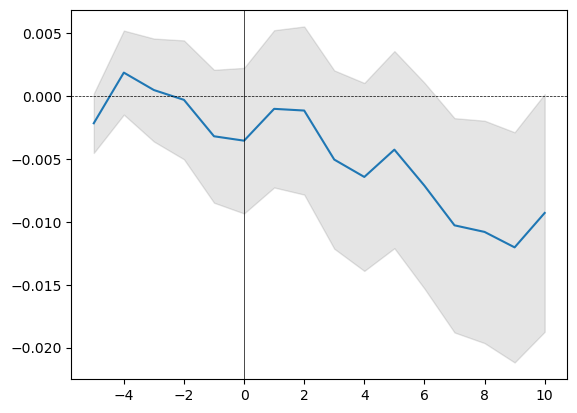

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-5,-0.002,0.002,-0.002,0.002,-1.166,0.244
-4,0.004,0.002,0.002,0.003,0.719,0.472
-3,-0.001,0.002,0.0,0.003,0.153,0.878
-2,-0.001,0.002,-0.0,0.004,-0.078,0.938
-1,-0.003,0.002,-0.003,0.004,-0.773,0.440
0,-0.000,0.002,-0.004,0.005,-0.783,0.434
1,0.003,0.002,-0.001,0.005,-0.206,0.837
2,-0.000,0.002,-0.001,0.005,-0.218,0.827
3,-0.004,0.002,-0.005,0.006,-0.911,0.362
4,-0.001,0.002,-0.006,0.006,-1.101,0.271


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-5,-0.002,0.000,6.988,-1.670,-0.110,-0.010,0.000,0.009,0.050
-4,0.002,0.001,3.267,0.545,-0.072,-0.011,0.004,0.014,0.094
-3,0.000,0.001,1.041,-0.016,-0.080,-0.020,0.005,0.014,0.096
-2,-0.000,0.001,0.861,-0.132,-0.127,-0.027,0.004,0.025,0.100
-1,-0.003,0.002,0.031,0.033,-0.110,-0.034,-0.006,0.028,0.101
0,-0.004,0.002,0.794,-0.178,-0.150,-0.031,-0.007,0.023,0.105
1,-0.001,0.002,-0.324,-0.072,-0.112,-0.033,0.005,0.028,0.091
2,-0.001,0.003,0.569,0.044,-0.121,-0.032,0.004,0.028,0.161
3,-0.005,0.003,0.327,-0.136,-0.146,-0.034,0.000,0.029,0.152
4,-0.006,0.003,0.068,-0.260,-0.153,-0.033,-0.002,0.032,0.153


ADBE.O


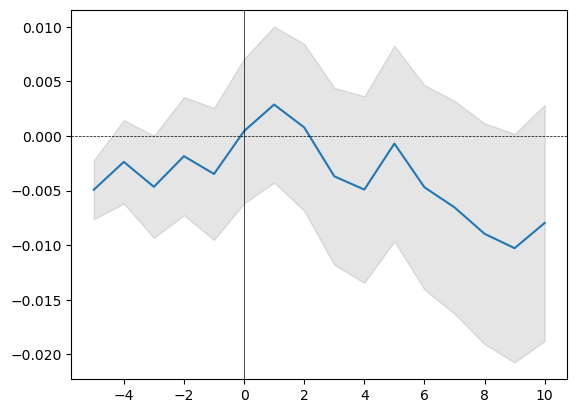

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-5,-0.005,0.002,-0.005 **,0.002,-2.337,0.019
-4,0.003,0.002,-0.002,0.003,-0.794,0.427
-3,-0.002,0.002,-0.005,0.004,-1.275,0.202
-2,0.003,0.002,-0.002,0.004,-0.438,0.662
-1,-0.002,0.002,-0.003,0.005,-0.737,0.461
0,0.004,0.002,0.0,0.005,0.087,0.931
1,0.002,0.002,0.003,0.006,0.516,0.606
2,-0.002,0.002,0.001,0.006,0.132,0.895
3,-0.004,0.002,-0.004,0.006,-0.583,0.560
4,-0.001,0.002,-0.005,0.007,-0.736,0.462


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-5,-0.005,0.001,7.138,-1.071,-0.126,-0.013,-0.004,0.004,0.076
-4,-0.002,0.000,0.032,0.386,-0.044,-0.015,-0.003,0.009,0.055
-3,-0.005,0.001,2.546,0.510,-0.079,-0.020,-0.007,0.013,0.103
-2,-0.002,0.001,1.108,0.177,-0.107,-0.025,-0.003,0.018,0.108
-1,-0.003,0.001,0.729,-0.101,-0.108,-0.024,-0.004,0.016,0.092
0,0.000,0.002,1.297,0.520,-0.089,-0.021,-0.002,0.017,0.134
1,0.003,0.002,0.014,-0.011,-0.096,-0.025,0.002,0.031,0.094
2,0.001,0.002,0.359,-0.215,-0.128,-0.027,0.006,0.028,0.109
3,-0.004,0.002,1.206,-0.450,-0.179,-0.031,-0.001,0.027,0.105
4,-0.005,0.003,0.955,-0.535,-0.200,-0.030,-0.002,0.029,0.138


INTC.O


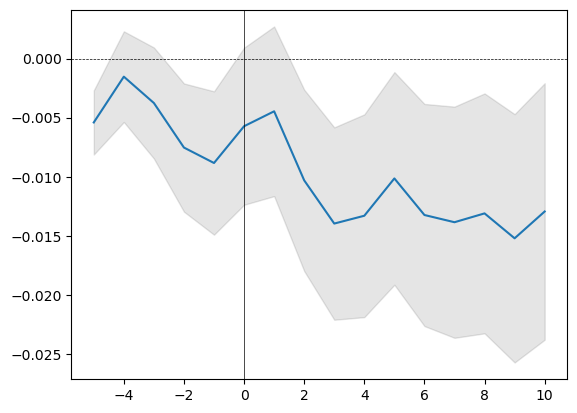

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-5,-0.005,0.002,-0.005 **,0.002,-2.552,0.011
-4,0.004,0.002,-0.002,0.003,-0.510,0.610
-3,-0.002,0.002,-0.004,0.004,-1.025,0.305
-2,-0.004,0.002,-0.008 *,0.004,-1.778,0.075
-1,-0.001,0.002,-0.009 *,0.005,-1.866,0.062
0,0.003,0.002,-0.006,0.005,-1.104,0.270
1,0.001,0.002,-0.004,0.006,-0.796,0.426
2,-0.006,0.002,-0.01 *,0.006,-1.721,0.085
3,-0.004,0.002,-0.014 **,0.006,-2.198,0.028
4,0.001,0.002,-0.013 **,0.007,-1.986,0.047


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-5,-0.005,0.001,11.112,-2.184,-0.162,-0.012,-0.004,0.006,0.068
-4,-0.002,0.001,1.679,-0.390,-0.087,-0.014,-0.002,0.013,0.058
-3,-0.004,0.001,1.507,-0.217,-0.094,-0.017,-0.001,0.015,0.097
-2,-0.008,0.003,2.212,-0.651,-0.211,-0.030,-0.004,0.016,0.140
-1,-0.009,0.003,2.881,-0.795,-0.217,-0.026,-0.011,0.014,0.102
0,-0.006,0.003,2.901,-0.871,-0.236,-0.029,0.001,0.019,0.124
1,-0.004,0.003,4.332,-0.962,-0.256,-0.032,-0.001,0.017,0.124
2,-0.010,0.003,4.128,-1.052,-0.251,-0.036,-0.008,0.016,0.109
3,-0.014,0.003,2.975,-0.992,-0.256,-0.040,-0.013,0.017,0.104
4,-0.013,0.004,1.252,-0.754,-0.232,-0.036,-0.007,0.021,0.111


CSCO.O


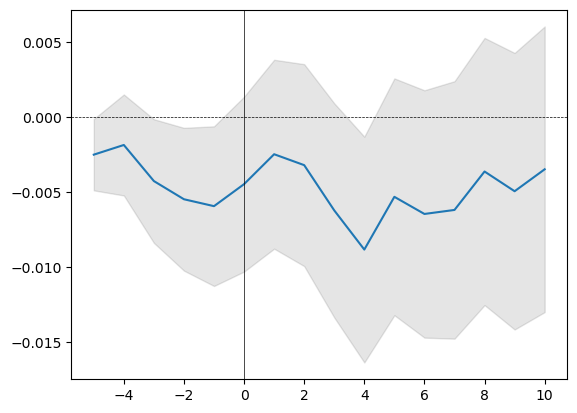

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-5,-0.002,0.002,-0.002,0.002,-1.338,0.181
-4,0.001,0.002,-0.002,0.003,-0.700,0.484
-3,-0.002,0.002,-0.004,0.003,-1.320,0.187
-2,-0.001,0.002,-0.005,0.004,-1.469,0.142
-1,-0.000,0.002,-0.006,0.004,-1.425,0.154
0,0.001,0.002,-0.004,0.005,-0.978,0.328
1,0.002,0.002,-0.002,0.005,-0.500,0.617
2,-0.001,0.002,-0.003,0.005,-0.606,0.544
3,-0.003,0.002,-0.006,0.006,-1.113,0.266
4,-0.003,0.002,-0.009,0.006,-1.500,0.134


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-5,-0.002,0.000,7.014,-1.612,-0.084,-0.008,-0.001,0.007,0.044
-4,-0.002,0.000,0.259,-0.289,-0.047,-0.011,-0.001,0.011,0.046
-3,-0.004,0.001,3.538,-1.486,-0.114,-0.014,-0.003,0.015,0.039
-2,-0.005,0.001,4.105,-1.362,-0.143,-0.020,-0.003,0.015,0.049
-1,-0.006,0.001,0.568,-0.391,-0.088,-0.022,-0.006,0.011,0.056
0,-0.004,0.001,2.021,-0.386,-0.116,-0.020,-0.006,0.013,0.089
1,-0.002,0.001,0.980,0.270,-0.088,-0.018,-0.006,0.018,0.098
2,-0.003,0.001,0.670,-0.506,-0.109,-0.022,-0.003,0.023,0.068
3,-0.006,0.001,1.125,-0.243,-0.128,-0.027,-0.005,0.021,0.107
4,-0.009,0.002,1.947,-0.937,-0.168,-0.033,-0.009,0.022,0.069


NFLX.O


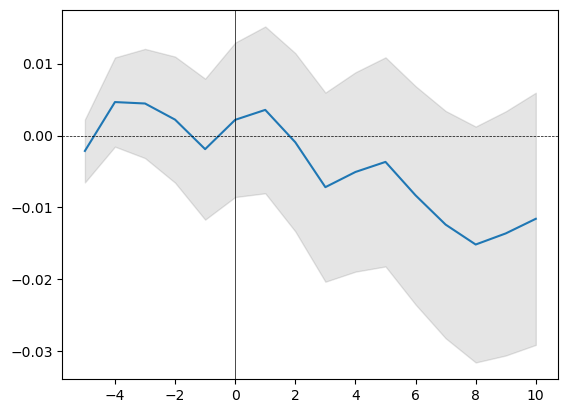

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-5,-0.002,0.003,-0.002,0.003,-0.625,0.532
-4,0.007,0.003,0.005,0.005,0.963,0.336
-3,-0.000,0.003,0.004,0.006,0.753,0.452
-2,-0.002,0.003,0.002,0.007,0.324,0.746
-1,-0.004,0.003,-0.002,0.008,-0.247,0.805
0,0.004,0.003,0.002,0.008,0.261,0.794
1,0.001,0.003,0.004,0.009,0.395,0.693
2,-0.005,0.003,-0.001,0.010,-0.097,0.923
3,-0.006,0.003,-0.007,0.010,-0.699,0.485
4,0.002,0.003,-0.005,0.011,-0.468,0.640


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-5,-0.002,0.001,3.574,0.105,-0.132,-0.020,-0.002,0.012,0.133
-4,0.005,0.003,4.241,1.510,-0.110,-0.023,-0.002,0.024,0.211
-3,0.004,0.004,4.009,1.602,-0.131,-0.026,-0.007,0.021,0.249
-2,0.002,0.004,3.902,1.529,-0.127,-0.033,-0.008,0.023,0.273
-1,-0.002,0.005,4.067,1.372,-0.152,-0.038,-0.006,0.021,0.290
0,0.002,0.006,2.252,1.050,-0.170,-0.052,-0.006,0.033,0.302
1,0.004,0.005,2.271,0.643,-0.189,-0.038,0.013,0.037,0.283
2,-0.001,0.005,2.961,0.663,-0.199,-0.048,0.007,0.033,0.282
3,-0.007,0.006,2.292,0.467,-0.205,-0.058,-0.000,0.031,0.281
4,-0.005,0.006,1.720,0.284,-0.202,-0.047,-0.005,0.041,0.271


TSLA.O


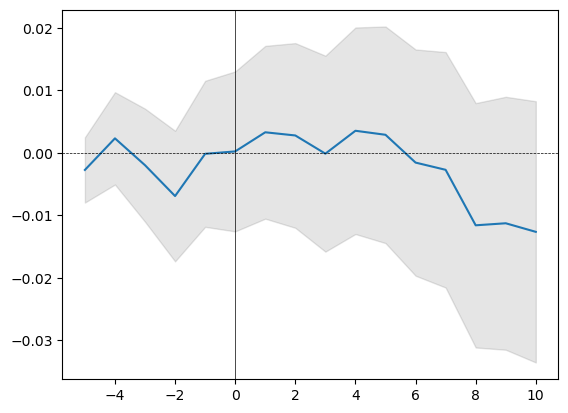

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-5,-0.003,0.004,-0.003,0.004,-0.669,0.503
-4,0.005,0.004,0.002,0.006,0.403,0.687
-3,-0.004,0.004,-0.002,0.007,-0.279,0.780
-2,-0.005,0.004,-0.007,0.008,-0.847,0.397
-1,0.007,0.004,-0.0,0.009,-0.016,0.987
0,0.000,0.004,0.0,0.010,0.024,0.981
1,0.003,0.004,0.003,0.011,0.306,0.760
2,-0.001,0.004,0.003,0.012,0.242,0.809
3,-0.003,0.004,-0.0,0.012,-0.010,0.992
4,0.004,0.004,0.004,0.013,0.275,0.784


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-5,-0.003,0.002,8.544,-0.604,-0.220,-0.015,0.001,0.017,0.201
-4,0.002,0.003,3.268,0.167,-0.196,-0.026,-0.001,0.025,0.179
-3,-0.002,0.005,6.154,-0.663,-0.338,-0.035,0.002,0.030,0.226
-2,-0.007,0.006,2.545,0.588,-0.184,-0.041,-0.003,0.022,0.275
-1,-0.000,0.007,1.575,0.207,-0.257,-0.058,0.007,0.046,0.272
0,0.000,0.009,3.082,-0.892,-0.367,-0.058,0.015,0.053,0.234
1,0.003,0.011,5.737,-1.580,-0.453,-0.050,0.016,0.062,0.236
2,0.003,0.013,6.815,-1.539,-0.562,-0.065,0.010,0.056,0.240
3,-0.000,0.011,1.359,-0.411,-0.378,-0.074,0.012,0.044,0.250
4,0.004,0.015,2.082,0.106,-0.365,-0.061,0.019,0.060,0.446


NVDA.O


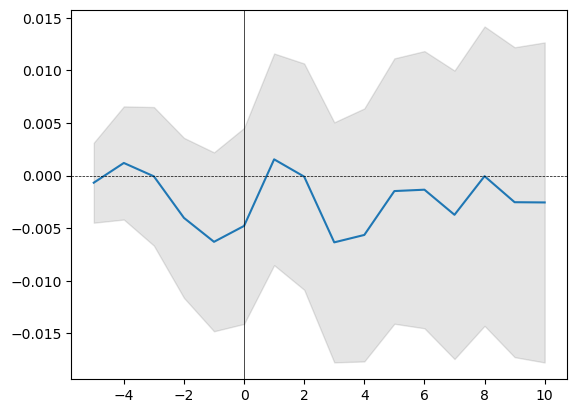

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-5,-0.001,0.003,-0.001,0.003,-0.227,0.820
-4,0.002,0.003,0.001,0.004,0.286,0.775
-3,-0.001,0.003,-0.0,0.005,-0.014,0.989
-2,-0.004,0.003,-0.004,0.006,-0.677,0.498
-1,-0.002,0.003,-0.006,0.007,-0.949,0.343
0,0.002,0.003,-0.005,0.007,-0.658,0.510
1,0.006,0.003,0.002,0.008,0.197,0.844
2,-0.002,0.003,-0.0,0.008,-0.012,0.991
3,-0.006,0.003,-0.006,0.009,-0.713,0.476
4,0.001,0.003,-0.006,0.009,-0.601,0.548


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-5,-0.001,0.001,6.476,-0.867,-0.173,-0.015,0.002,0.013,0.099
-4,0.001,0.001,4.214,1.313,-0.070,-0.018,-0.001,0.015,0.137
-3,-0.000,0.002,4.232,0.863,-0.110,-0.018,-0.001,0.018,0.163
-2,-0.004,0.002,2.911,0.180,-0.164,-0.025,-0.003,0.019,0.144
-1,-0.006,0.003,2.063,0.097,-0.180,-0.035,-0.008,0.023,0.150
0,-0.005,0.003,4.662,-0.512,-0.241,-0.029,-0.009,0.022,0.160
1,0.002,0.003,1.285,0.174,-0.136,-0.030,0.000,0.031,0.152
2,-0.000,0.003,4.090,0.683,-0.178,-0.027,-0.006,0.032,0.241
3,-0.006,0.004,2.811,0.470,-0.167,-0.042,-0.011,0.029,0.236
4,-0.006,0.005,2.498,0.418,-0.191,-0.041,-0.011,0.030,0.268


In [98]:
for ticker, event in releases.items():
    print(ticker)
    event.plot()
    plt.show()
    display(event.results())
    display(event.get_CAR_dist())

#Note: Asterisks are added automatically to highlight the level of significance (Significance level: *** at 99%, ** at 95%, * at 90%). You can remove asterisks by setting asterisks parameter at False.

In [99]:
release_10K.to_excel('export.xlsx')

# No 2. Event window (-10, +10), Estimation size = 100

In [100]:
tickers = ['AAPL.O', 'MSFT.O', 'AMZN.O', 'GOOGL.O', 'ADBE.O', 'INTC.O', 'CSCO.O', 'NFLX.O', 'TSLA.O', 'NVDA.O']
releases = dict()

for ticker in tickers:
    events = [event for event in events_db if event['security_ticker']==ticker]
    
    estimation_size = 100
    
    releases[ticker] = es.Multiple.from_list(
        events,
        es.Single.FamaFrench_3factor,
        event_window= (-10,+10)
    )

2023-06-05 22:17:47,211 P[20506] [MainThread 140704694428480]  11 events have not been processed due to data issues.
Tips: Get more details on errors by calling Multiple.error_report() method or by exploring Multiple.errors class variable.
2023-06-05 22:17:47,323 P[20506] [MainThread 140704694428480]  11 events have not been processed due to data issues.
Tips: Get more details on errors by calling Multiple.error_report() method or by exploring Multiple.errors class variable.
2023-06-05 22:17:47,409 P[20506] [MainThread 140704694428480]  11 events have not been processed due to data issues.
Tips: Get more details on errors by calling Multiple.error_report() method or by exploring Multiple.errors class variable.
2023-06-05 22:17:47,492 P[20506] [MainThread 140704694428480]  11 events have not been processed due to data issues.
Tips: Get more details on errors by calling Multiple.error_report() method or by exploring Multiple.errors class variable.
2023-06-05 22:17:47,577 P[20506] [MainTh

In [101]:
print(release_10K.error_report())

Error Report

80 errors due to data unavailability.
The respective events was not processed and thus removed from the sample.
It does not affect the computation of other events.

Help 1: Check if the company was quoted at this date, 
Help 2: For event study modelised used Fama-French models,
        check if the Fama-French dataset imported is up-to-date.
Tips:   Re-import all parameters and re-run the event study analysis.

Details
(You can find more details on errors in the documentation.)

Error            Date                       Parameters                                  
---------------- -------------------------- ----------------------------------------------
DataMissingError 2012-01-24T00:00:00.000000 security_ticker: AAPL.O; market_ticker: .IXIC 
Description: Some data are missing for (AAPL.O) in 'returns''.

DataMissingError 2012-03-13T00:00:00.000000 security_ticker: AAPL.O; market_ticker: .IXIC 
Description: Some data are missing for (AAPL.O) in 'returns''.

DataMissingE

AAPL.O


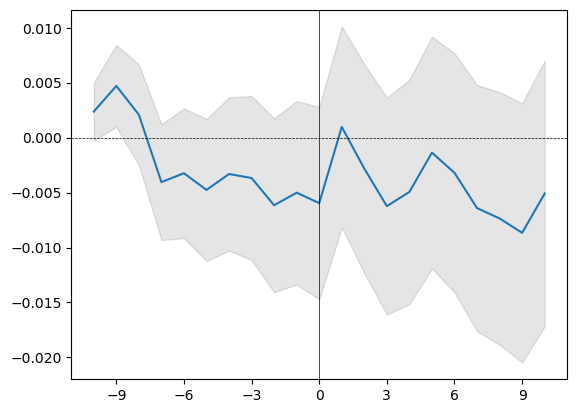

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-10,0.002,0.002,0.002,0.002,1.149,0.250
-9,0.002,0.002,0.005,0.003,1.616,0.106
-8,-0.003,0.002,0.002,0.004,0.584,0.559
-7,-0.006,0.002,-0.004,0.004,-0.984,0.325
-6,0.001,0.002,-0.003,0.005,-0.704,0.481
-5,-0.002,0.002,-0.005,0.005,-0.944,0.345
-4,0.001,0.002,-0.003,0.005,-0.608,0.543
-3,-0.000,0.002,-0.004,0.006,-0.632,0.528
-2,-0.002,0.002,-0.006,0.006,-0.997,0.319
-1,0.001,0.002,-0.005,0.007,-0.770,0.441


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-10,0.002,0.000,2.864,0.470,-0.060,-0.006,0.001,0.011,0.086
-9,0.005,0.001,2.320,0.165,-0.080,-0.007,0.002,0.014,0.078
-8,0.002,0.001,3.395,-0.029,-0.114,-0.017,-0.000,0.016,0.100
-7,-0.004,0.001,1.216,-0.272,-0.111,-0.024,-0.001,0.017,0.087
-6,-0.003,0.002,2.220,-0.755,-0.160,-0.027,0.005,0.020,0.098
-5,-0.005,0.002,1.750,-0.814,-0.140,-0.026,0.001,0.022,0.107
-4,-0.003,0.002,0.265,-0.178,-0.118,-0.026,-0.002,0.022,0.105
-3,-0.004,0.002,1.647,-0.457,-0.157,-0.027,0.001,0.023,0.138
-2,-0.006,0.003,0.883,-0.323,-0.157,-0.039,0.003,0.026,0.144
-1,-0.005,0.003,0.522,-0.470,-0.166,-0.036,0.005,0.026,0.137


MSFT.O


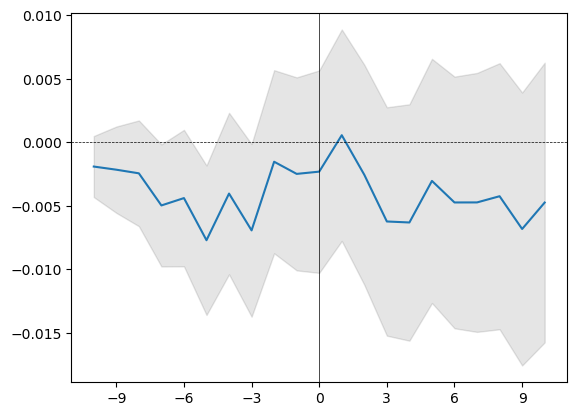

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-10,-0.002,0.002,-0.002,0.002,-1.017,0.309
-9,-0.000,0.002,-0.002,0.003,-0.812,0.417
-8,-0.000,0.002,-0.002,0.003,-0.751,0.453
-7,-0.003,0.002,-0.005,0.004,-1.325,0.185
-6,0.001,0.002,-0.004,0.004,-1.047,0.295
-5,-0.003,0.002,-0.008 *,0.005,-1.678,0.093
-4,0.004,0.002,-0.004,0.005,-0.813,0.416
-3,-0.003,0.002,-0.007,0.005,-1.307,0.191
-2,0.005,0.002,-0.002,0.006,-0.271,0.786
-1,-0.001,0.002,-0.002,0.006,-0.419,0.675


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-10,-0.002,0.000,1.862,-0.066,-0.054,-0.013,-0.002,0.009,0.058
-9,-0.002,0.000,2.798,-1.130,-0.072,-0.009,-0.000,0.011,0.041
-8,-0.002,0.000,2.421,-0.576,-0.086,-0.016,-0.001,0.011,0.054
-7,-0.005,0.001,1.209,-0.567,-0.114,-0.022,-0.002,0.014,0.077
-6,-0.004,0.001,1.417,-0.958,-0.125,-0.018,0.004,0.019,0.084
-5,-0.008,0.001,3.246,-1.279,-0.164,-0.026,-0.002,0.016,0.078
-4,-0.004,0.001,0.860,-0.573,-0.112,-0.023,-0.001,0.020,0.078
-3,-0.007,0.002,2.989,-1.360,-0.180,-0.022,-0.002,0.016,0.082
-2,-0.002,0.003,1.005,-0.332,-0.160,-0.028,0.000,0.027,0.138
-1,-0.002,0.003,1.898,-0.374,-0.187,-0.029,-0.001,0.028,0.142


AMZN.O


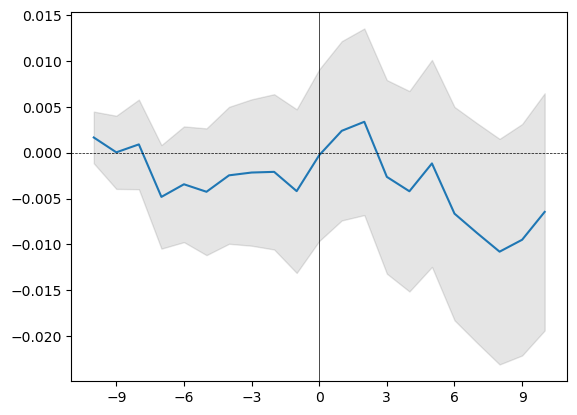

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-10,0.002,0.002,0.002,0.002,0.758,0.449
-9,-0.002,0.002,0.0,0.003,0.016,0.988
-8,0.001,0.002,0.001,0.004,0.240,0.811
-7,-0.006,0.002,-0.005,0.004,-1.092,0.275
-6,0.001,0.002,-0.003,0.005,-0.698,0.485
-5,-0.001,0.002,-0.004,0.005,-0.788,0.430
-4,0.002,0.002,-0.002,0.006,-0.422,0.673
-3,0.000,0.002,-0.002,0.006,-0.346,0.729
-2,0.000,0.002,-0.002,0.007,-0.315,0.753
-1,-0.002,0.002,-0.004,0.007,-0.601,0.548


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-10,0.002,0.000,0.543,0.775,-0.037,-0.011,-0.002,0.012,0.057
-9,0.000,0.001,2.066,0.231,-0.076,-0.014,-0.002,0.013,0.084
-8,0.001,0.001,2.509,0.740,-0.091,-0.016,-0.004,0.014,0.117
-7,-0.005,0.001,0.058,0.175,-0.097,-0.030,-0.010,0.021,0.090
-6,-0.003,0.002,1.528,-0.364,-0.162,-0.025,-0.005,0.023,0.108
-5,-0.004,0.002,1.791,-0.495,-0.166,-0.025,-0.007,0.019,0.093
-4,-0.002,0.002,0.740,0.081,-0.123,-0.023,-0.003,0.014,0.102
-3,-0.002,0.002,0.422,-0.074,-0.106,-0.030,0.006,0.022,0.119
-2,-0.002,0.003,0.474,0.618,-0.115,-0.040,-0.003,0.022,0.159
-1,-0.004,0.003,0.127,0.534,-0.111,-0.047,-0.011,0.021,0.148


GOOGL.O


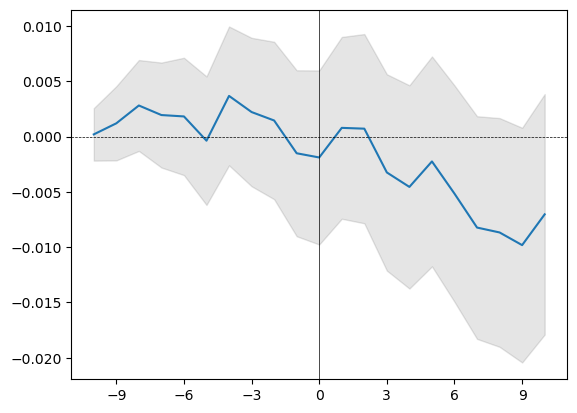

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-10,0.000,0.002,0.0,0.002,0.106,0.916
-9,0.001,0.002,0.001,0.003,0.457,0.647
-8,0.002,0.002,0.003,0.003,0.876,0.381
-7,-0.001,0.002,0.002,0.004,0.525,0.599
-6,-0.000,0.002,0.002,0.004,0.440,0.660
-5,-0.002,0.002,-0.0,0.005,-0.082,0.935
-4,0.004,0.002,0.004,0.005,0.750,0.453
-3,-0.001,0.002,0.002,0.005,0.423,0.672
-2,-0.001,0.002,0.001,0.006,0.262,0.794
-1,-0.003,0.002,-0.002,0.006,-0.258,0.796


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-10,0.000,0.000,0.840,-0.311,-0.052,-0.009,0.001,0.011,0.041
-9,0.001,0.000,1.093,-0.827,-0.054,-0.007,0.002,0.014,0.043
-8,0.003,0.000,0.607,-0.182,-0.050,-0.008,0.003,0.016,0.056
-7,0.002,0.002,9.093,1.692,-0.127,-0.018,0.002,0.016,0.212
-6,0.002,0.002,5.033,1.085,-0.114,-0.020,-0.002,0.024,0.200
-5,-0.000,0.002,5.327,0.744,-0.150,-0.019,0.001,0.020,0.205
-4,0.004,0.002,5.224,1.107,-0.112,-0.019,0.001,0.028,0.206
-3,0.002,0.003,4.307,-0.382,-0.193,-0.017,0.004,0.031,0.175
-2,0.001,0.003,1.093,-0.196,-0.148,-0.027,0.004,0.033,0.144
-1,-0.002,0.003,2.616,-0.534,-0.218,-0.029,-0.001,0.033,0.149


ADBE.O


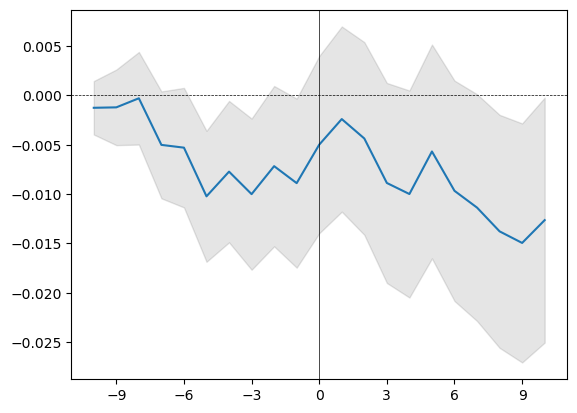

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-10,-0.001,0.002,-0.001,0.002,-0.596,0.551
-9,0.000,0.002,-0.001,0.003,-0.406,0.685
-8,0.001,0.002,-0.0,0.004,-0.081,0.936
-7,-0.005,0.002,-0.005,0.004,-1.187,0.235
-6,-0.000,0.002,-0.005,0.005,-1.121,0.262
-5,-0.005,0.002,-0.01 **,0.005,-1.976,0.048
-4,0.003,0.002,-0.008,0.006,-1.382,0.167
-3,-0.002,0.002,-0.01 *,0.006,-1.674,0.094
-2,0.003,0.002,-0.007,0.006,-1.131,0.258
-1,-0.002,0.002,-0.009,0.007,-1.331,0.183


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-10,-0.001,0.000,2.140,0.010,-0.063,-0.010,-0.002,0.006,0.058
-9,-0.001,0.001,2.279,-0.963,-0.086,-0.010,0.001,0.012,0.046
-8,-0.000,0.001,7.161,0.407,-0.130,-0.017,-0.000,0.008,0.135
-7,-0.005,0.002,3.613,0.181,-0.123,-0.024,-0.004,0.015,0.157
-6,-0.005,0.002,2.489,-0.658,-0.186,-0.031,0.000,0.022,0.136
-5,-0.010,0.002,1.371,-0.336,-0.156,-0.037,-0.005,0.020,0.132
-4,-0.008,0.002,1.330,-0.012,-0.131,-0.034,-0.002,0.019,0.131
-3,-0.010,0.002,1.819,-0.152,-0.158,-0.035,-0.009,0.014,0.141
-2,-0.007,0.002,1.537,-0.018,-0.139,-0.033,-0.004,0.022,0.160
-1,-0.009,0.002,1.446,0.117,-0.135,-0.035,-0.009,0.016,0.150


INTC.O


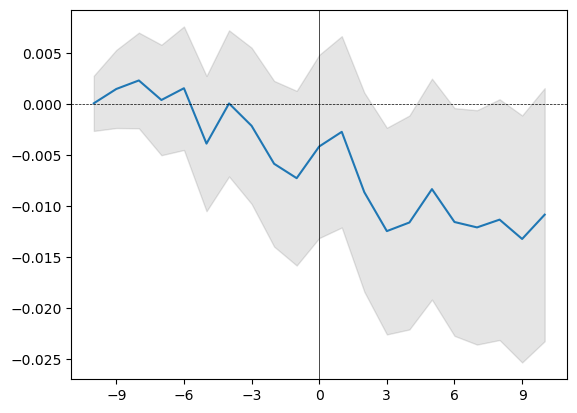

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-10,0.000,0.002,0.0,0.002,0.047,0.963
-9,0.001,0.002,0.002,0.003,0.504,0.614
-8,0.001,0.002,0.002,0.004,0.640,0.522
-7,-0.002,0.002,0.0,0.004,0.101,0.920
-6,0.001,0.002,0.002,0.005,0.334,0.738
-5,-0.005,0.002,-0.004,0.005,-0.744,0.457
-4,0.004,0.002,0.0,0.006,0.016,0.987
-3,-0.002,0.002,-0.002,0.006,-0.352,0.725
-2,-0.004,0.002,-0.006,0.006,-0.920,0.358
-1,-0.001,0.002,-0.007,0.007,-1.084,0.279


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-10,0.000,0.000,4.029,-1.106,-0.075,-0.008,0.000,0.010,0.038
-9,0.002,0.000,3.248,-1.141,-0.082,-0.009,0.004,0.012,0.047
-8,0.002,0.001,3.098,-0.649,-0.127,-0.016,0.001,0.022,0.091
-7,0.000,0.002,2.980,-0.385,-0.166,-0.019,0.001,0.024,0.130
-6,0.002,0.002,0.456,-0.310,-0.113,-0.017,0.002,0.029,0.099
-5,-0.004,0.002,0.429,-0.432,-0.153,-0.035,-0.004,0.027,0.113
-4,0.000,0.002,0.296,-0.074,-0.123,-0.035,0.004,0.033,0.131
-3,-0.002,0.003,2.795,-0.411,-0.198,-0.029,0.006,0.033,0.196
-2,-0.006,0.004,-0.033,-0.060,-0.170,-0.042,-0.005,0.036,0.156
-1,-0.007,0.004,-0.103,-0.186,-0.184,-0.052,-0.011,0.045,0.152


CSCO.O


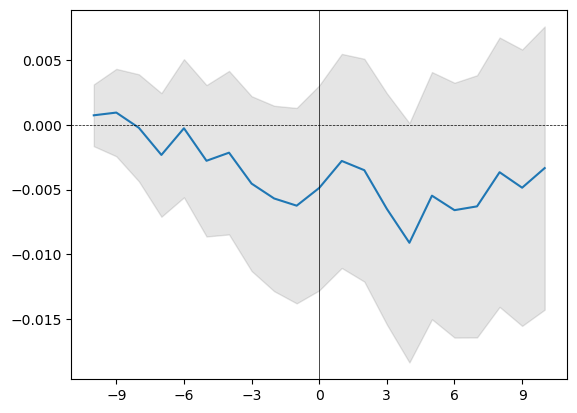

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-10,0.001,0.002,0.001,0.002,0.404,0.687
-9,0.000,0.002,0.001,0.003,0.365,0.715
-8,-0.001,0.002,-0.0,0.003,-0.066,0.947
-7,-0.002,0.002,-0.002,0.004,-0.620,0.535
-6,0.002,0.002,-0.0,0.004,-0.060,0.952
-5,-0.003,0.002,-0.003,0.005,-0.605,0.545
-4,0.001,0.002,-0.002,0.005,-0.433,0.665
-3,-0.002,0.002,-0.005,0.005,-0.859,0.390
-2,-0.001,0.002,-0.006,0.006,-1.015,0.310
-1,-0.001,0.002,-0.006,0.006,-1.057,0.290


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-10,0.001,0.000,0.588,0.013,-0.036,-0.007,0.001,0.007,0.034
-9,0.001,0.000,5.327,-1.254,-0.076,-0.006,0.004,0.012,0.051
-8,-0.000,0.000,3.997,-1.206,-0.085,-0.006,0.002,0.009,0.051
-7,-0.002,0.001,7.335,-1.755,-0.143,-0.013,0.002,0.010,0.067
-6,-0.000,0.001,0.691,-0.454,-0.082,-0.014,0.002,0.018,0.073
-5,-0.003,0.001,1.606,-0.986,-0.116,-0.015,0.001,0.020,0.082
-4,-0.002,0.001,0.487,-0.862,-0.104,-0.021,0.005,0.018,0.063
-3,-0.005,0.002,2.998,-1.457,-0.173,-0.018,-0.000,0.025,0.070
-2,-0.006,0.002,1.059,-0.964,-0.147,-0.027,-0.000,0.024,0.062
-1,-0.006,0.002,0.843,-0.802,-0.148,-0.029,0.001,0.022,0.067


NFLX.O


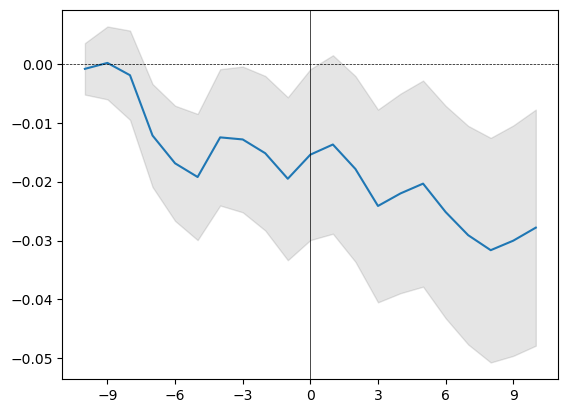

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-10,-0.001,0.003,-0.001,0.003,-0.241,0.809
-9,0.001,0.003,0.0,0.005,0.038,0.970
-8,-0.002,0.003,-0.002,0.006,-0.322,0.747
-7,-0.010,0.003,-0.012 *,0.007,-1.779,0.075
-6,-0.005,0.003,-0.017 **,0.008,-2.209,0.027
-5,-0.002,0.003,-0.019 **,0.008,-2.295,0.022
-4,0.007,0.003,-0.012,0.009,-1.380,0.168
-3,-0.000,0.003,-0.013,0.010,-1.327,0.185
-2,-0.002,0.003,-0.015,0.010,-1.480,0.139
-1,-0.004,0.003,-0.02 *,0.011,-1.805,0.071


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-10,-0.001,0.001,1.563,-0.010,-0.087,-0.016,-0.002,0.015,0.085
-9,0.000,0.002,2.972,0.565,-0.095,-0.018,-0.001,0.024,0.172
-8,-0.002,0.004,2.429,0.267,-0.168,-0.026,0.000,0.027,0.197
-7,-0.012,0.004,1.773,0.267,-0.189,-0.041,-0.008,0.019,0.208
-6,-0.017,0.005,1.911,-0.097,-0.205,-0.045,-0.009,0.017,0.206
-5,-0.019,0.006,0.768,0.320,-0.185,-0.057,-0.023,0.023,0.198
-4,-0.012,0.007,0.922,0.735,-0.186,-0.061,-0.020,0.032,0.233
-3,-0.013,0.007,1.521,0.865,-0.193,-0.060,-0.022,0.030,0.272
-2,-0.015,0.008,1.852,1.016,-0.213,-0.078,-0.024,0.029,0.295
-1,-0.020,0.008,2.199,1.049,-0.207,-0.079,-0.029,0.027,0.313


TSLA.O


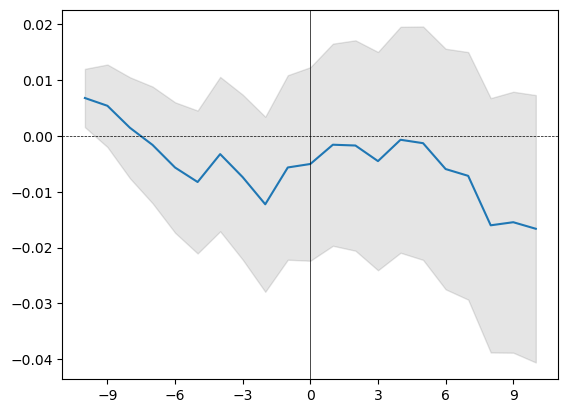

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-10,0.007,0.004,0.007 *,0.004,1.661,0.097
-9,-0.001,0.004,0.005,0.006,0.933,0.351
-8,-0.004,0.004,0.001,0.007,0.203,0.839
-7,-0.003,0.004,-0.002,0.008,-0.199,0.842
-6,-0.004,0.004,-0.006,0.009,-0.623,0.533
-5,-0.003,0.004,-0.008,0.010,-0.828,0.408
-4,0.005,0.004,-0.003,0.011,-0.304,0.761
-3,-0.004,0.004,-0.007,0.012,-0.642,0.521
-2,-0.005,0.004,-0.012,0.012,-1.002,0.316
-1,0.007,0.004,-0.006,0.013,-0.439,0.660


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-10,0.007,0.002,1.957,0.998,-0.106,-0.018,-0.003,0.021,0.162
-9,0.005,0.003,1.739,0.147,-0.173,-0.023,0.005,0.029,0.170
-8,0.001,0.004,1.858,0.312,-0.211,-0.030,0.004,0.025,0.195
-7,-0.002,0.006,3.207,0.542,-0.255,-0.038,-0.003,0.031,0.293
-6,-0.006,0.009,2.873,0.109,-0.339,-0.060,-0.002,0.047,0.316
-5,-0.008,0.009,3.515,-0.224,-0.367,-0.058,-0.010,0.035,0.306
-4,-0.003,0.012,3.403,-0.020,-0.419,-0.065,-0.001,0.042,0.368
-3,-0.007,0.015,5.412,-0.520,-0.562,-0.072,-0.008,0.039,0.385
-2,-0.012,0.014,1.516,0.366,-0.378,-0.079,-0.022,0.042,0.361
-1,-0.006,0.016,1.494,0.138,-0.399,-0.074,-0.015,0.059,0.362


NVDA.O


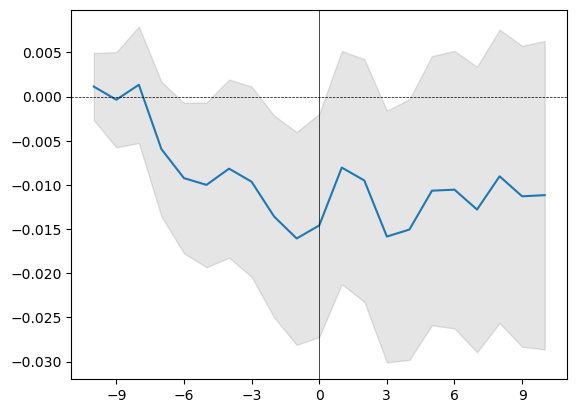

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-10,0.001,0.003,0.001,0.003,0.380,0.704
-9,-0.001,0.003,-0.0,0.004,-0.086,0.932
-8,0.002,0.003,0.001,0.005,0.259,0.796
-7,-0.007,0.003,-0.006,0.006,-1.000,0.317
-6,-0.003,0.003,-0.009,0.007,-1.389,0.165
-5,-0.001,0.003,-0.01,0.007,-1.373,0.170
-4,0.002,0.003,-0.008,0.008,-1.038,0.299
-3,-0.001,0.003,-0.01,0.008,-1.147,0.251
-2,-0.004,0.003,-0.014,0.009,-1.523,0.128
-1,-0.002,0.003,-0.016 *,0.009,-1.709,0.087


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-10,0.001,0.001,-0.108,0.179,-0.058,-0.015,-0.000,0.018,0.063
-9,-0.000,0.001,3.180,-1.209,-0.146,-0.014,0.003,0.018,0.086
-8,0.001,0.002,2.558,-0.892,-0.172,-0.013,0.005,0.020,0.097
-7,-0.006,0.003,1.628,-0.853,-0.166,-0.026,0.002,0.024,0.147
-6,-0.009,0.004,2.636,-1.149,-0.251,-0.041,-0.001,0.027,0.142
-5,-0.010,0.004,1.259,-0.801,-0.241,-0.039,-0.004,0.028,0.127
-4,-0.008,0.004,0.077,-0.398,-0.165,-0.044,-0.003,0.033,0.132
-3,-0.010,0.004,0.392,-0.346,-0.193,-0.041,-0.009,0.029,0.173
-2,-0.014,0.005,-0.383,-0.016,-0.163,-0.057,-0.017,0.037,0.162
-1,-0.016,0.006,0.901,-0.460,-0.274,-0.057,-0.011,0.026,0.167


In [102]:
for ticker, event in releases.items():
    print(ticker)
    event.plot()
    plt.show()
    display(event.results())
    display(event.get_CAR_dist())

In [103]:
release_10K.to_excel('export1.xlsx')

# No 3. Event window (-2, +20), Estimation size = 300

In [104]:
tickers = ['AAPL.O', 'MSFT.O', 'AMZN.O', 'GOOGL.O', 'ADBE.O', 'INTC.O', 'CSCO.O', 'NFLX.O', 'TSLA.O', 'NVDA.O']
releases = dict()

for ticker in tickers:
    events = [event for event in events_db if event['security_ticker']==ticker]
    
    estimation_size = 300
    
    releases[ticker] = es.Multiple.from_list(
        events,
        es.Single.FamaFrench_3factor,
        event_window= (-2,+20)
    )

2023-06-05 22:18:00,385 P[20506] [MainThread 140704694428480]  12 events have not been processed due to data issues.
Tips: Get more details on errors by calling Multiple.error_report() method or by exploring Multiple.errors class variable.
2023-06-05 22:18:00,475 P[20506] [MainThread 140704694428480]  12 events have not been processed due to data issues.
Tips: Get more details on errors by calling Multiple.error_report() method or by exploring Multiple.errors class variable.
2023-06-05 22:18:00,557 P[20506] [MainThread 140704694428480]  12 events have not been processed due to data issues.
Tips: Get more details on errors by calling Multiple.error_report() method or by exploring Multiple.errors class variable.
2023-06-05 22:18:00,640 P[20506] [MainThread 140704694428480]  12 events have not been processed due to data issues.
Tips: Get more details on errors by calling Multiple.error_report() method or by exploring Multiple.errors class variable.
2023-06-05 22:18:00,724 P[20506] [MainTh

In [105]:
print(release_10K.error_report())

Error Report

80 errors due to data unavailability.
The respective events was not processed and thus removed from the sample.
It does not affect the computation of other events.

Help 1: Check if the company was quoted at this date, 
Help 2: For event study modelised used Fama-French models,
        check if the Fama-French dataset imported is up-to-date.
Tips:   Re-import all parameters and re-run the event study analysis.

Details
(You can find more details on errors in the documentation.)

Error            Date                       Parameters                                  
---------------- -------------------------- ----------------------------------------------
DataMissingError 2012-01-24T00:00:00.000000 security_ticker: AAPL.O; market_ticker: .IXIC 
Description: Some data are missing for (AAPL.O) in 'returns''.

DataMissingError 2012-03-13T00:00:00.000000 security_ticker: AAPL.O; market_ticker: .IXIC 
Description: Some data are missing for (AAPL.O) in 'returns''.

DataMissingE

AAPL.O


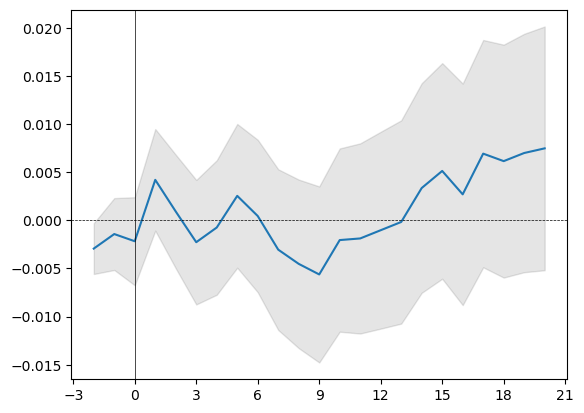

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-2,-0.003,0.002,-0.003,0.002,-1.428,0.153
-1,0.002,0.002,-0.001,0.003,-0.491,0.623
0,-0.001,0.002,-0.002,0.004,-0.610,0.542
1,0.006,0.002,0.004,0.004,1.019,0.308
2,-0.003,0.002,0.001,0.005,0.198,0.843
3,-0.003,0.002,-0.002,0.005,-0.451,0.652
4,0.002,0.002,-0.001,0.005,-0.138,0.890
5,0.003,0.002,0.003,0.006,0.435,0.663
6,-0.002,0.002,0.0,0.006,0.072,0.943
7,-0.003,0.002,-0.003,0.007,-0.468,0.639


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-2,-0.003,0.001,5.051,0.513,-0.080,-0.013,-0.003,0.007,0.094
-1,-0.001,0.001,1.165,0.059,-0.071,-0.019,-0.000,0.015,0.086
0,-0.002,0.001,0.553,-0.510,-0.092,-0.021,-0.003,0.018,0.068
1,0.004,0.001,0.635,-0.130,-0.101,-0.017,0.006,0.025,0.100
2,0.001,0.002,0.053,-0.189,-0.105,-0.022,-0.002,0.033,0.098
3,-0.002,0.003,-0.201,-0.096,-0.139,-0.030,-0.005,0.040,0.135
4,-0.001,0.004,0.125,-0.078,-0.169,-0.033,-0.010,0.047,0.167
5,0.003,0.004,-0.059,0.190,-0.141,-0.031,-0.005,0.050,0.174
6,0.000,0.004,-0.246,0.353,-0.106,-0.045,-0.003,0.046,0.177
7,-0.003,0.004,0.413,0.517,-0.131,-0.050,-0.017,0.043,0.214


MSFT.O


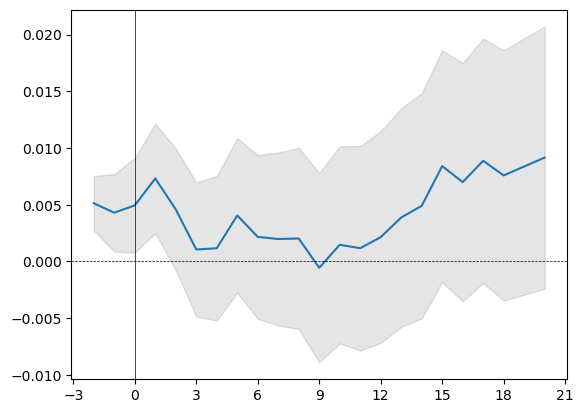

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-2,0.005,0.002,0.005 ***,0.002,2.727,0.006
-1,-0.001,0.002,0.004,0.003,1.616,0.106
0,0.001,0.002,0.005,0.003,1.517,0.129
1,0.002,0.002,0.007 *,0.004,1.945,0.052
2,-0.003,0.002,0.005,0.004,1.091,0.275
3,-0.004,0.002,0.001,0.005,0.229,0.819
4,0.000,0.002,0.001,0.005,0.233,0.816
5,0.003,0.002,0.004,0.005,0.763,0.446
6,-0.002,0.002,0.002,0.006,0.384,0.701
7,-0.000,0.002,0.002,0.006,0.332,0.740


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-2,0.005,0.001,5.269,1.292,-0.079,-0.010,0.003,0.013,0.124
-1,0.004,0.001,4.461,1.250,-0.073,-0.009,0.002,0.014,0.128
0,0.005,0.001,3.000,0.283,-0.098,-0.009,0.005,0.021,0.133
1,0.007,0.002,3.305,-0.038,-0.133,-0.011,0.007,0.025,0.132
2,0.005,0.002,1.762,-0.211,-0.116,-0.020,0.004,0.024,0.124
3,0.001,0.002,2.164,-0.581,-0.154,-0.025,0.004,0.023,0.123
4,0.001,0.002,2.576,-0.785,-0.180,-0.023,0.005,0.030,0.116
5,0.004,0.002,0.665,-0.057,-0.128,-0.019,0.004,0.033,0.128
6,0.002,0.002,0.772,0.064,-0.123,-0.022,0.001,0.026,0.133
7,0.002,0.003,0.282,0.039,-0.113,-0.028,0.002,0.027,0.132


AMZN.O


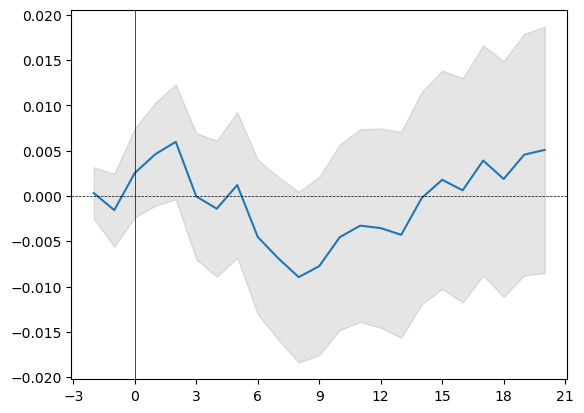

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-2,0.000,0.002,0.0,0.002,0.148,0.883
-1,-0.002,0.002,-0.002,0.003,-0.496,0.620
0,0.004,0.002,0.003,0.004,0.661,0.508
1,0.002,0.002,0.005,0.004,1.039,0.299
2,0.001,0.002,0.006,0.005,1.207,0.227
3,-0.006,0.002,-0.0,0.005,-0.008,0.994
4,-0.001,0.002,-0.001,0.006,-0.239,0.811
5,0.003,0.002,0.001,0.006,0.193,0.847
6,-0.006,0.002,-0.005,0.007,-0.679,0.497
7,-0.002,0.002,-0.007,0.007,-0.980,0.327


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-2,0.000,0.001,4.398,1.189,-0.102,-0.012,-0.002,0.007,0.141
-1,-0.002,0.002,3.601,0.763,-0.125,-0.020,-0.005,0.014,0.139
0,0.003,0.002,1.564,0.637,-0.113,-0.016,-0.004,0.017,0.132
1,0.005,0.002,1.047,0.389,-0.113,-0.019,-0.001,0.021,0.123
2,0.006,0.002,1.253,0.320,-0.140,-0.023,0.004,0.026,0.139
3,-0.000,0.003,1.321,-0.097,-0.201,-0.029,-0.003,0.034,0.146
4,-0.001,0.004,2.204,-0.129,-0.232,-0.032,-0.002,0.026,0.171
5,0.001,0.004,0.491,0.352,-0.141,-0.037,-0.005,0.035,0.168
6,-0.005,0.004,0.354,0.205,-0.148,-0.040,-0.008,0.021,0.170
7,-0.007,0.005,0.654,0.553,-0.165,-0.046,-0.012,0.023,0.194


GOOGL.O


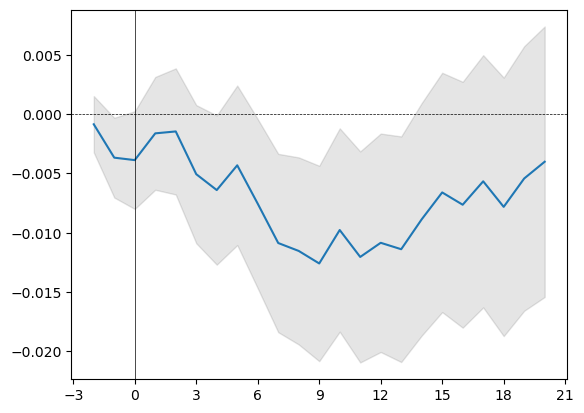

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-2,-0.001,0.002,-0.001,0.002,-0.466,0.641
-1,-0.003,0.002,-0.004,0.003,-1.402,0.161
0,-0.000,0.002,-0.004,0.003,-1.209,0.227
1,0.002,0.002,-0.002,0.004,-0.439,0.660
2,0.000,0.002,-0.001,0.004,-0.354,0.724
3,-0.004,0.002,-0.005,0.005,-1.116,0.265
4,-0.001,0.002,-0.006,0.005,-1.306,0.192
5,0.002,0.002,-0.004,0.005,-0.824,0.410
6,-0.003,0.002,-0.008,0.006,-1.358,0.174
7,-0.003,0.002,-0.011 *,0.006,-1.854,0.064


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-2,-0.001,0.001,3.887,1.106,-0.074,-0.013,-0.004,0.006,0.100
-1,-0.004,0.001,1.719,0.819,-0.062,-0.020,-0.006,0.009,0.094
0,-0.004,0.001,1.632,0.301,-0.098,-0.019,-0.004,0.011,0.094
1,-0.002,0.001,0.787,0.311,-0.080,-0.017,0.000,0.012,0.099
2,-0.001,0.002,1.713,0.457,-0.102,-0.027,0.002,0.014,0.148
3,-0.005,0.002,1.128,0.060,-0.127,-0.030,-0.005,0.021,0.139
4,-0.006,0.002,0.852,-0.045,-0.129,-0.032,-0.007,0.017,0.140
5,-0.004,0.003,1.246,0.153,-0.147,-0.030,-0.004,0.024,0.165
6,-0.008,0.003,1.319,0.069,-0.151,-0.037,-0.009,0.024,0.159
7,-0.011,0.003,0.955,-0.135,-0.187,-0.043,-0.012,0.019,0.146


ADBE.O


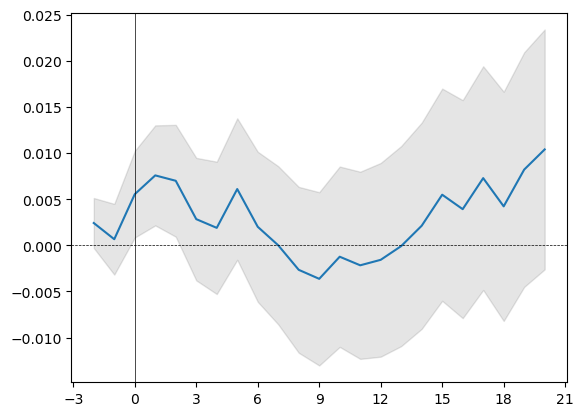

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-2,0.002,0.002,0.002,0.002,1.141,0.254
-1,-0.002,0.002,0.001,0.003,0.219,0.827
0,0.005,0.002,0.006,0.004,1.510,0.131
1,0.002,0.002,0.008 *,0.004,1.790,0.073
2,-0.001,0.002,0.007,0.005,1.478,0.139
3,-0.004,0.002,0.003,0.005,0.547,0.585
4,-0.001,0.002,0.002,0.006,0.337,0.736
5,0.004,0.002,0.006,0.006,1.019,0.308
6,-0.004,0.002,0.002,0.006,0.316,0.752
7,-0.002,0.002,-0.0,0.007,-0.000,1.000


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-2,0.002,0.001,7.762,1.854,-0.079,-0.012,0.002,0.011,0.150
-1,0.001,0.001,4.873,-0.784,-0.124,-0.009,0.002,0.012,0.085
0,0.006,0.001,1.932,0.487,-0.102,-0.013,0.001,0.020,0.116
1,0.008,0.002,0.401,-0.093,-0.113,-0.012,0.004,0.029,0.090
2,0.007,0.002,1.313,-0.214,-0.146,-0.013,0.003,0.030,0.113
3,0.003,0.002,2.596,-0.741,-0.197,-0.026,0.006,0.026,0.093
4,0.002,0.003,2.758,-0.795,-0.220,-0.023,0.007,0.029,0.138
5,0.006,0.003,0.291,-0.297,-0.142,-0.028,0.011,0.044,0.135
6,0.002,0.003,-0.281,-0.392,-0.145,-0.035,0.004,0.042,0.097
7,-0.000,0.003,-0.101,-0.256,-0.149,-0.034,0.002,0.042,0.136


INTC.O


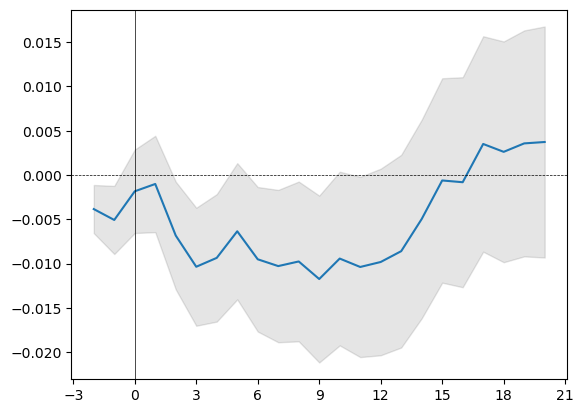

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-2,-0.004,0.002,-0.004 *,0.002,-1.811,0.070
-1,-0.001,0.002,-0.005 *,0.003,-1.691,0.091
0,0.003,0.002,-0.002,0.004,-0.500,0.617
1,0.001,0.002,-0.001,0.004,-0.238,0.812
2,-0.006,0.002,-0.007,0.005,-1.440,0.150
3,-0.004,0.002,-0.01 **,0.005,-1.992,0.046
4,0.001,0.002,-0.009 *,0.006,-1.666,0.096
5,0.003,0.002,-0.006,0.006,-1.058,0.290
6,-0.003,0.002,-0.01,0.006,-1.494,0.135
7,-0.001,0.002,-0.01,0.007,-1.532,0.126


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-2,-0.004,0.002,5.001,0.145,-0.173,-0.014,-0.004,0.007,0.174
-1,-0.005,0.002,4.348,-1.000,-0.178,-0.019,0.000,0.012,0.105
0,-0.002,0.002,3.176,-0.960,-0.198,-0.019,0.008,0.020,0.126
1,-0.001,0.003,4.308,-1.408,-0.218,-0.016,0.002,0.024,0.104
2,-0.007,0.002,4.255,-1.299,-0.213,-0.024,-0.003,0.021,0.086
3,-0.010,0.003,2.730,-0.749,-0.218,-0.033,-0.011,0.018,0.147
4,-0.009,0.003,1.261,-0.488,-0.194,-0.035,-0.005,0.021,0.146
5,-0.006,0.004,1.762,-0.009,-0.184,-0.045,-0.005,0.023,0.184
6,-0.010,0.004,2.119,-0.480,-0.238,-0.048,-0.007,0.021,0.157
7,-0.010,0.004,2.933,-0.260,-0.248,-0.045,-0.009,0.030,0.228


CSCO.O


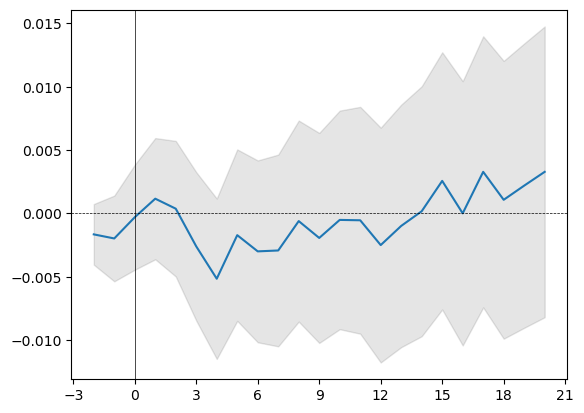

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-2,-0.002,0.002,-0.002,0.002,-0.885,0.376
-1,-0.000,0.002,-0.002,0.003,-0.748,0.455
0,0.002,0.002,-0.0,0.003,-0.093,0.926
1,0.001,0.002,0.001,0.004,0.312,0.755
2,-0.001,0.002,0.0,0.004,0.090,0.928
3,-0.003,0.002,-0.003,0.005,-0.569,0.570
4,-0.003,0.002,-0.005,0.005,-1.043,0.297
5,0.003,0.002,-0.002,0.005,-0.325,0.746
6,-0.001,0.002,-0.003,0.006,-0.534,0.593
7,0.000,0.002,-0.003,0.006,-0.495,0.621


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-2,-0.002,0.000,14.263,1.123,-0.087,-0.009,-0.000,0.007,0.109
-1,-0.002,0.000,5.496,-1.450,-0.080,-0.009,-0.001,0.007,0.026
0,-0.000,0.001,2.726,-0.563,-0.082,-0.008,0.002,0.011,0.072
1,0.001,0.001,6.576,0.446,-0.104,-0.011,0.002,0.013,0.125
2,0.000,0.001,8.735,0.544,-0.124,-0.015,0.001,0.015,0.149
3,-0.003,0.001,3.258,-0.475,-0.143,-0.020,-0.002,0.015,0.102
4,-0.005,0.002,5.348,-1.398,-0.184,-0.019,-0.006,0.016,0.087
5,-0.002,0.002,4.480,0.824,-0.124,-0.026,-0.002,0.018,0.181
6,-0.003,0.002,1.851,0.325,-0.113,-0.025,-0.003,0.021,0.151
7,-0.003,0.003,4.162,0.795,-0.148,-0.031,-0.001,0.023,0.216


NFLX.O


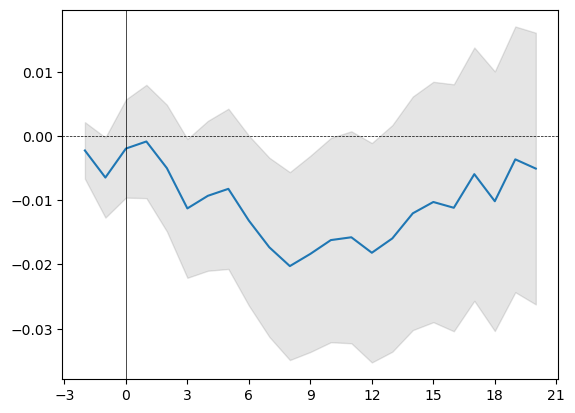

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-2,-0.002,0.003,-0.002,0.003,-0.650,0.516
-1,-0.004,0.003,-0.006,0.005,-1.326,0.185
0,0.005,0.003,-0.002,0.006,-0.326,0.745
1,0.001,0.003,-0.001,0.007,-0.122,0.903
2,-0.004,0.003,-0.005,0.008,-0.648,0.517
3,-0.006,0.003,-0.011,0.008,-1.336,0.182
4,0.002,0.003,-0.009,0.009,-1.021,0.307
5,0.001,0.003,-0.008,0.010,-0.844,0.399
6,-0.005,0.003,-0.013,0.010,-1.274,0.203
7,-0.004,0.003,-0.017,0.011,-1.591,0.112


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-2,-0.002,0.001,1.515,-0.298,-0.077,-0.014,-0.002,0.013,0.072
-1,-0.006,0.001,0.469,-0.471,-0.106,-0.027,-0.003,0.016,0.064
0,-0.002,0.002,0.471,0.109,-0.105,-0.027,-0.002,0.023,0.120
1,-0.001,0.002,0.148,-0.415,-0.122,-0.026,0.005,0.027,0.096
2,-0.005,0.002,-0.423,-0.141,-0.104,-0.027,-0.005,0.022,0.080
3,-0.011,0.003,0.804,-0.176,-0.171,-0.043,-0.006,0.013,0.135
4,-0.009,0.004,1.293,-0.229,-0.211,-0.043,-0.008,0.024,0.154
5,-0.008,0.004,-0.036,-0.033,-0.201,-0.054,-0.009,0.029,0.130
6,-0.013,0.005,0.142,-0.021,-0.222,-0.062,-0.016,0.037,0.155
7,-0.017,0.005,0.133,-0.063,-0.246,-0.068,-0.017,0.032,0.145


TSLA.O


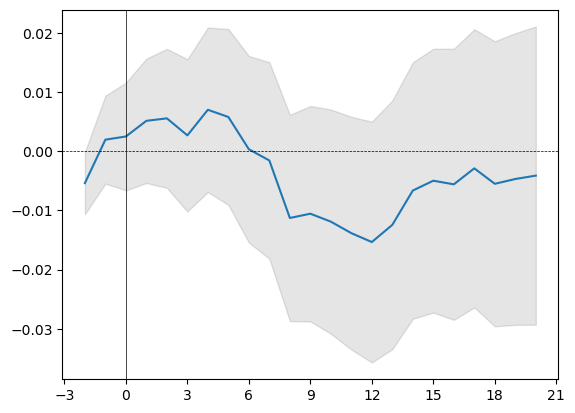

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-2,-0.005,0.004,-0.005,0.004,-1.315,0.188
-1,0.007,0.004,0.002,0.006,0.337,0.736
0,0.001,0.004,0.002,0.007,0.350,0.726
1,0.003,0.004,0.005,0.008,0.626,0.531
2,0.000,0.004,0.006,0.009,0.606,0.545
3,-0.003,0.004,0.003,0.010,0.267,0.790
4,0.004,0.004,0.007,0.011,0.645,0.519
5,-0.001,0.004,0.006,0.012,0.499,0.618
6,-0.005,0.004,0.0,0.012,0.027,0.979
7,-0.002,0.004,-0.002,0.013,-0.121,0.904


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-2,-0.005,0.001,9.650,1.894,-0.083,-0.019,-0.005,0.009,0.182
-1,0.002,0.004,1.850,-0.211,-0.211,-0.032,0.004,0.035,0.197
0,0.002,0.005,4.756,-0.970,-0.294,-0.035,0.009,0.044,0.222
1,0.005,0.009,7.553,-1.179,-0.408,-0.031,0.010,0.052,0.342
2,0.006,0.011,8.235,-0.884,-0.490,-0.029,0.006,0.049,0.401
3,0.003,0.009,2.558,0.074,-0.304,-0.054,0.000,0.046,0.351
4,0.007,0.011,2.185,0.160,-0.290,-0.049,0.015,0.054,0.335
5,0.006,0.011,3.878,1.005,-0.259,-0.054,0.014,0.050,0.463
6,0.000,0.011,0.936,0.302,-0.264,-0.070,0.010,0.062,0.343
7,-0.002,0.012,-0.025,0.131,-0.236,-0.087,0.018,0.070,0.304


NVDA.O


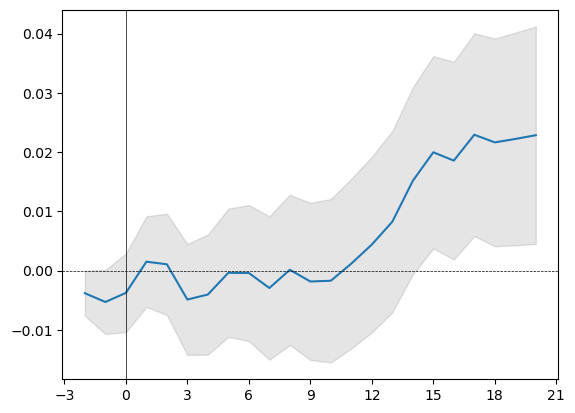

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-2,-0.004,0.003,-0.004,0.003,-1.276,0.202
-1,-0.001,0.003,-0.005,0.004,-1.253,0.210
0,0.002,0.003,-0.004,0.005,-0.726,0.468
1,0.005,0.003,0.002,0.006,0.253,0.800
2,-0.000,0.003,0.001,0.007,0.160,0.873
3,-0.006,0.003,-0.005,0.007,-0.667,0.505
4,0.001,0.003,-0.004,0.008,-0.510,0.610
5,0.004,0.003,-0.0,0.008,-0.043,0.966
6,-0.000,0.003,-0.0,0.009,-0.044,0.965
7,-0.003,0.003,-0.003,0.009,-0.310,0.756


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-2,-0.004,0.001,4.300,-0.077,-0.110,-0.016,-0.005,0.008,0.096
-1,-0.005,0.001,1.560,-0.341,-0.125,-0.025,-0.004,0.013,0.096
0,-0.004,0.002,6.230,-1.826,-0.187,-0.022,-0.002,0.022,0.061
1,0.002,0.002,4.981,0.872,-0.128,-0.021,0.006,0.024,0.211
2,0.001,0.003,2.458,0.752,-0.125,-0.026,0.000,0.027,0.188
3,-0.005,0.004,2.560,0.577,-0.159,-0.035,-0.005,0.033,0.227
4,-0.004,0.004,2.125,0.351,-0.184,-0.043,-0.006,0.035,0.214
5,-0.000,0.005,2.275,1.039,-0.159,-0.043,-0.012,0.034,0.270
6,-0.000,0.005,1.672,0.729,-0.185,-0.044,-0.011,0.033,0.262
7,-0.003,0.007,0.737,0.274,-0.259,-0.052,-0.019,0.041,0.210


In [106]:
for ticker, event in releases.items():
    print(ticker)
    event.plot()
    plt.show()
    display(event.results())
    display(event.get_CAR_dist())

In [107]:
release_10K.to_excel('export2.xlsx')